In [1]:
# All the necesssary imports.
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation, Dropout
from keras.layers import LeakyReLU
from keras import initializers
from keras.datasets import mnist
from keras.optimizers import Adam, RMSprop, SGD
import numpy as np
import matplotlib.pyplot as plt

/Users/rajdua/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/rajdua/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Load in the data.
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize to [-1, 1] (easier to work with)
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

# For the sake of time don't work with the entire dataset.
x_train = x_train[:10000]
y_train = x_train[:10000]

# Flatten the data.
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

11493376/11490434 [==============================] - 10s 1us/step


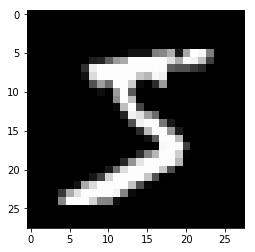

In [6]:
# Plot out a sample image (reshaped to 28 x 28)
plt.imshow(x_train[0].reshape(28, 28), cmap=plt.get_cmap('gray'))
plt.show()

In [32]:
# How many noise dimensions our generator should take in
NOISE_DIM = 100 # Feel free to tweak this and see what changes

def generator():
    ###################################
    #TODO: Implement
    model = Sequential()
    model.add(Dense(256, input_dim=NOISE_DIM, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
    model.add(LeakyReLU(0.2))                
    model.add(Dense(512))
    model.add(LeakyReLU(0.2)) 
    model.add(Dense(1024))
    model.add(LeakyReLU(0.2))           
    model.add(Dense(784, activation = 'tanh'))
    return model
    
    ###################################

In [33]:
def discriminator():
    ###################################
    #TODO: Implement
    model = Sequential()
    
    model.add(Dense(512, input_dim=784))
    model.add(LeakyReLU(0.2))   
    model.add(Dropout(0,2))
    
    model.add(Dense(256))
    model.add(LeakyReLU(0.2))  
    model.add(Dropout(0,2))
    
    model.add(Dense(128))
    model.add(LeakyReLU(0.2)) 
    model.add(Dropout(0,2))
    
    model.add(Dense(1, activation = 'sigmoid'))
    model.add(Dropout(0,2))
    
    return model
    ###################################

In [34]:
def combine(generator, discriminator):
    ###################################
    # TODO: Implement
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    return model
    ###################################

In [41]:
# Compile the discriminator, generator, and full GAN. 

# Use this optimizer for each of the models
opt = Adam(lr=.0002, beta_1=0.5)

#############################################
# TODO: Compile generator and discriminator
d = discriminator()
d.compile(loss= 'binary_crossentropy', optimizer = opt)

g = generator()
g.compile (loss = 'binary_crossentropy', optimizer = opt)

gd = combine (g,d)
gd.compile (loss = 'binary_crossentropy', optimizer = opt)
#############################################

In [42]:
# Helper function to display sample from the network
def disp_sample(g):
    noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
    generated_images = g.predict(noise, verbose=0)
    show_im = generated_images[0]
    show_im = (show_im + 1) / 2.0
    show_im = show_im.reshape(28, 28)
    plt.imshow(show_im, cmap='gray')
    plt.show()

Epoch #0


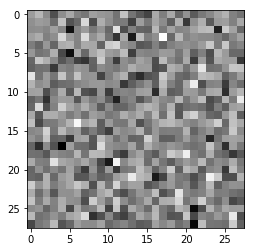

Number batches 78
0(0/78) D: 0.5483, G: 0.6836
0(1/78) D: 0.4140, G: 0.6588
0(2/78) D: 0.4005, G: 0.6291
0(3/78) D: 0.4162, G: 0.5967
0(4/78) D: 0.4416, G: 0.5622
0(5/78) D: 0.4731, G: 0.5310
0(6/78) D: 0.5093, G: 0.5075
0(7/78) D: 0.5339, G: 0.4953
0(8/78) D: 0.5475, G: 0.4904
0(9/78) D: 0.5532, G: 0.5070
0(10/78) D: 0.5408, G: 0.5401
0(11/78) D: 0.5158, G: 0.5913
0(12/78) D: 0.4804, G: 0.6591
0(13/78) D: 0.4413, G: 0.7219
0(14/78) D: 0.4095, G: 0.7744
0(15/78) D: 0.3861, G: 0.8109
0(16/78) D: 0.3684, G: 0.8274
0(17/78) D: 0.3584, G: 0.8412
0(18/78) D: 0.3495, G: 0.8517
0(19/78) D: 0.3396, G: 0.8529
0(20/78) D: 0.3331, G: 0.8507
0(21/78) D: 0.3275, G: 0.8541
0(22/78) D: 0.3213, G: 0.8634
0(23/78) D: 0.3160, G: 0.8706
0(24/78) D: 0.3124, G: 0.8756
0(25/78) D: 0.3122, G: 0.8743
0(26/78) D: 0.3156, G: 0.8637
0(27/78) D: 0.3236, G: 0.8454
0(28/78) D: 0.3326, G: 0.8192
0(29/78) D: 0.3394, G: 0.8012
0(30/78) D: 0.3526, G: 0.7779
0(31/78) D: 0.3626, G: 0.7592
0(32/78) D: 0.3732, G: 0.7402
0(

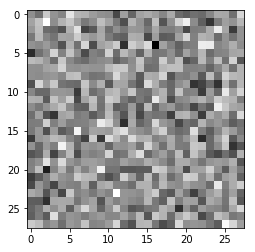

Number batches 78
1(0/78) D: 0.2217, G: 1.1061
1(1/78) D: 0.2176, G: 1.1329
1(2/78) D: 0.2130, G: 1.1656
1(3/78) D: 0.2064, G: 1.2147
1(4/78) D: 0.1970, G: 1.2786
1(5/78) D: 0.1843, G: 1.3509
1(6/78) D: 0.1717, G: 1.4227
1(7/78) D: 0.1606, G: 1.4824
1(8/78) D: 0.1529, G: 1.5178
1(9/78) D: 0.1495, G: 1.5211
1(10/78) D: 0.1498, G: 1.5120
1(11/78) D: 0.1512, G: 1.4953
1(12/78) D: 0.1537, G: 1.4972
1(13/78) D: 0.1554, G: 1.5306
1(14/78) D: 0.1519, G: 1.5987
1(15/78) D: 0.1450, G: 1.6924
1(16/78) D: 0.1326, G: 1.8046
1(17/78) D: 0.1190, G: 1.9181
1(18/78) D: 0.1079, G: 1.9865
1(19/78) D: 0.1021, G: 2.0163
1(20/78) D: 0.0998, G: 2.0181
1(21/78) D: 0.0983, G: 2.0171
1(22/78) D: 0.1004, G: 2.0163
1(23/78) D: 0.1011, G: 2.0273
1(24/78) D: 0.1040, G: 2.0514
1(25/78) D: 0.1017, G: 2.1314
1(26/78) D: 0.0946, G: 2.2711
1(27/78) D: 0.0840, G: 2.4469
1(28/78) D: 0.0747, G: 2.5774
1(29/78) D: 0.0663, G: 2.6883
1(30/78) D: 0.0599, G: 2.7686
1(31/78) D: 0.0570, G: 2.8097
1(32/78) D: 0.0554, G: 2.7854
1(

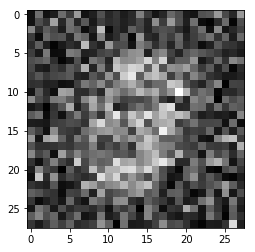

Number batches 78
2(0/78) D: 0.5047, G: 1.0647
2(1/78) D: 0.5790, G: 1.2842
2(2/78) D: 0.6134, G: 0.8711
2(3/78) D: 0.6527, G: 1.2589
2(4/78) D: 0.5844, G: 1.0334
2(5/78) D: 0.5918, G: 1.0837
2(6/78) D: 0.5760, G: 1.1567
2(7/78) D: 0.4959, G: 1.3232
2(8/78) D: 0.4519, G: 1.5380
2(9/78) D: 0.5923, G: 0.9645
2(10/78) D: 0.6375, G: 1.4222
2(11/78) D: 0.5315, G: 1.5450
2(12/78) D: 0.5704, G: 1.0410
2(13/78) D: 0.6246, G: 1.4677
2(14/78) D: 0.6482, G: 0.8709
2(15/78) D: 0.6842, G: 1.3728
2(16/78) D: 0.6048, G: 1.1780
2(17/78) D: 0.5571, G: 1.3539
2(18/78) D: 0.5696, G: 1.2188
2(19/78) D: 0.5354, G: 1.5519
2(20/78) D: 0.5022, G: 1.4159
2(21/78) D: 0.5501, G: 1.2896
2(22/78) D: 0.5691, G: 1.4914
2(23/78) D: 0.5906, G: 0.9327
2(24/78) D: 0.6219, G: 1.7417
2(25/78) D: 0.7227, G: 0.3717
2(26/78) D: 0.8697, G: 1.2282
2(27/78) D: 0.4170, G: 2.2020
2(28/78) D: 0.6431, G: 0.5796
2(29/78) D: 0.6735, G: 0.9109
2(30/78) D: 0.4917, G: 1.7309
2(31/78) D: 0.5958, G: 0.7664
2(32/78) D: 0.5998, G: 0.9387
2(

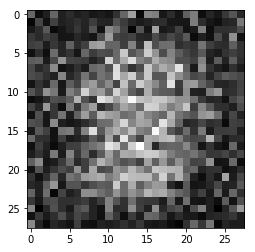

Number batches 78
3(0/78) D: 0.5275, G: 1.2454
3(1/78) D: 0.5459, G: 1.1016
3(2/78) D: 0.5757, G: 1.2601
3(3/78) D: 0.6290, G: 0.9849
3(4/78) D: 0.6444, G: 1.2535
3(5/78) D: 0.6450, G: 0.9003
3(6/78) D: 0.6000, G: 1.2778
3(7/78) D: 0.5303, G: 1.1424
3(8/78) D: 0.5159, G: 1.3032
3(9/78) D: 0.5201, G: 1.2393
3(10/78) D: 0.5099, G: 1.3826
3(11/78) D: 0.5043, G: 1.0018
3(12/78) D: 0.5528, G: 1.5682
3(13/78) D: 0.5277, G: 0.8864
3(14/78) D: 0.5816, G: 1.6453
3(15/78) D: 0.5363, G: 0.9706
3(16/78) D: 0.5722, G: 1.3636
3(17/78) D: 0.5716, G: 1.1117
3(18/78) D: 0.6666, G: 1.0505
3(19/78) D: 0.6421, G: 1.1381
3(20/78) D: 0.5852, G: 1.0473
3(21/78) D: 0.5445, G: 1.1974
3(22/78) D: 0.4885, G: 1.2311
3(23/78) D: 0.4605, G: 1.2774
3(24/78) D: 0.4598, G: 1.4737
3(25/78) D: 0.4331, G: 1.2988
3(26/78) D: 0.4375, G: 1.7480
3(27/78) D: 0.4465, G: 1.0692
3(28/78) D: 0.5458, G: 1.8394
3(29/78) D: 0.5242, G: 0.9837
3(30/78) D: 0.6196, G: 1.5759
3(31/78) D: 0.5833, G: 1.0881
3(32/78) D: 0.6173, G: 1.6713
3(

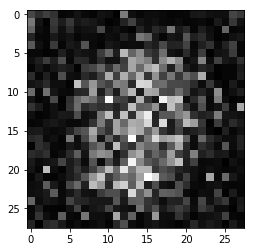

Number batches 78
4(0/78) D: 0.5885, G: 1.4259
4(1/78) D: 0.5270, G: 1.4793
4(2/78) D: 0.4662, G: 1.6790
4(3/78) D: 0.4363, G: 1.4953
4(4/78) D: 0.4438, G: 1.7669
4(5/78) D: 0.4234, G: 1.4543
4(6/78) D: 0.4479, G: 1.8537
4(7/78) D: 0.5249, G: 0.9065
4(8/78) D: 0.6497, G: 2.0443
4(9/78) D: 0.6334, G: 0.7556
4(10/78) D: 0.6094, G: 1.6944
4(11/78) D: 0.5387, G: 1.0892
4(12/78) D: 0.5277, G: 1.6310
4(13/78) D: 0.5037, G: 1.2923
4(14/78) D: 0.5532, G: 1.7014
4(15/78) D: 0.5708, G: 1.0111
4(16/78) D: 0.6334, G: 1.9049
4(17/78) D: 0.7117, G: 0.5324
4(18/78) D: 0.7744, G: 1.9442
4(19/78) D: 0.6567, G: 0.8038
4(20/78) D: 0.6004, G: 1.5656
4(21/78) D: 0.5075, G: 1.2876
4(22/78) D: 0.4909, G: 1.4203
4(23/78) D: 0.4943, G: 1.2681
4(24/78) D: 0.4864, G: 1.5528
4(25/78) D: 0.4610, G: 1.3972
4(26/78) D: 0.4691, G: 1.7862
4(27/78) D: 0.5050, G: 0.8823
4(28/78) D: 0.6120, G: 2.2608
4(29/78) D: 0.6799, G: 0.6790
4(30/78) D: 0.6763, G: 1.5045
4(31/78) D: 0.4690, G: 1.3971
4(32/78) D: 0.4331, G: 1.1310
4(

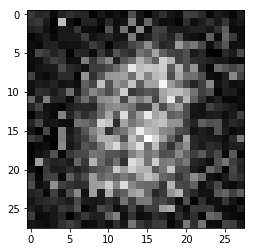

Number batches 78
5(0/78) D: 0.3742, G: 1.6273
5(1/78) D: 0.3894, G: 1.3220
5(2/78) D: 0.4527, G: 1.7675
5(3/78) D: 0.4792, G: 1.1682
5(4/78) D: 0.5325, G: 1.7606
5(5/78) D: 0.4556, G: 1.1360
5(6/78) D: 0.4507, G: 1.9114
5(7/78) D: 0.4329, G: 1.1418
5(8/78) D: 0.4169, G: 1.9834
5(9/78) D: 0.4106, G: 1.2360
5(10/78) D: 0.4209, G: 1.9818
5(11/78) D: 0.2880, G: 1.8946
5(12/78) D: 0.3329, G: 1.7070
5(13/78) D: 0.3574, G: 2.2593
5(14/78) D: 0.3971, G: 1.1777
5(15/78) D: 0.5125, G: 2.6073
5(16/78) D: 0.6115, G: 0.8872
5(17/78) D: 0.5218, G: 1.7837
5(18/78) D: 0.3021, G: 1.9462
5(19/78) D: 0.2916, G: 1.5306
5(20/78) D: 0.3222, G: 1.9878
5(21/78) D: 0.3077, G: 1.6892
5(22/78) D: 0.3003, G: 2.0928
5(23/78) D: 0.3084, G: 1.5333
5(24/78) D: 0.3528, G: 2.2126
5(25/78) D: 0.2853, G: 1.6646
5(26/78) D: 0.3148, G: 2.2052
5(27/78) D: 0.3044, G: 1.7015
5(28/78) D: 0.3404, G: 2.3483
5(29/78) D: 0.3306, G: 1.6345
5(30/78) D: 0.3549, G: 2.5952
5(31/78) D: 0.3549, G: 1.7403
5(32/78) D: 0.3901, G: 2.1885
5(

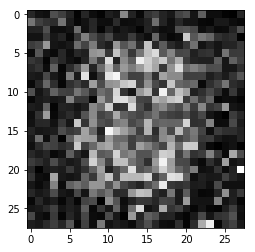

Number batches 78
6(0/78) D: 0.3995, G: 2.1737
6(1/78) D: 0.3800, G: 1.7316
6(2/78) D: 0.3616, G: 1.8314
6(3/78) D: 0.3722, G: 1.8890
6(4/78) D: 0.3664, G: 1.7232
6(5/78) D: 0.3766, G: 2.4469
6(6/78) D: 0.3978, G: 1.1742
6(7/78) D: 0.4972, G: 2.7995
6(8/78) D: 0.7150, G: 0.3168
6(9/78) D: 0.9175, G: 2.0162
6(10/78) D: 0.3746, G: 2.4230
6(11/78) D: 0.5317, G: 1.0907
6(12/78) D: 0.3957, G: 1.2441
6(13/78) D: 0.3592, G: 2.0377
6(14/78) D: 0.3285, G: 1.8686
6(15/78) D: 0.2756, G: 1.6936
6(16/78) D: 0.2768, G: 1.9478
6(17/78) D: 0.3225, G: 1.8293
6(18/78) D: 0.3196, G: 1.6662
6(19/78) D: 0.3884, G: 1.8139
6(20/78) D: 0.3666, G: 1.8889
6(21/78) D: 0.3426, G: 1.7153
6(22/78) D: 0.3604, G: 1.8457
6(23/78) D: 0.3505, G: 1.6063
6(24/78) D: 0.3470, G: 2.1191
6(25/78) D: 0.2685, G: 1.9003
6(26/78) D: 0.2820, G: 1.9364
6(27/78) D: 0.2819, G: 2.3587
6(28/78) D: 0.2894, G: 1.6264
6(29/78) D: 0.3284, G: 2.7796
6(30/78) D: 0.4076, G: 1.0258
6(31/78) D: 0.4785, G: 2.8771
6(32/78) D: 0.4032, G: 1.7550
6(

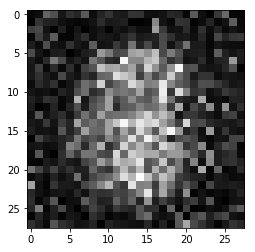

Number batches 78
7(0/78) D: 0.4549, G: 1.4502
7(1/78) D: 0.4385, G: 1.6328
7(2/78) D: 0.4317, G: 2.0785
7(3/78) D: 0.4247, G: 1.5436
7(4/78) D: 0.4343, G: 2.0861
7(5/78) D: 0.3997, G: 1.7215
7(6/78) D: 0.4235, G: 1.7104
7(7/78) D: 0.4434, G: 1.6124
7(8/78) D: 0.4005, G: 1.9390
7(9/78) D: 0.3585, G: 1.6265
7(10/78) D: 0.3260, G: 2.7514
7(11/78) D: 0.4702, G: 0.6223
7(12/78) D: 0.6360, G: 3.2922
7(13/78) D: 0.6270, G: 1.0028
7(14/78) D: 0.4181, G: 1.5864
7(15/78) D: 0.2753, G: 2.5803
7(16/78) D: 0.2666, G: 1.9363
7(17/78) D: 0.2617, G: 1.5938
7(18/78) D: 0.3033, G: 2.2561
7(19/78) D: 0.2863, G: 1.9695
7(20/78) D: 0.3111, G: 1.5165
7(21/78) D: 0.3648, G: 2.4576
7(22/78) D: 0.4207, G: 1.0554
7(23/78) D: 0.4715, G: 2.3632
7(24/78) D: 0.3516, G: 1.4690
7(25/78) D: 0.3385, G: 2.1425
7(26/78) D: 0.3023, G: 1.9701
7(27/78) D: 0.2903, G: 1.9379
7(28/78) D: 0.3183, G: 2.1928
7(29/78) D: 0.3725, G: 1.8309
7(30/78) D: 0.3723, G: 2.3697
7(31/78) D: 0.3631, G: 1.7489
7(32/78) D: 0.3313, G: 2.7781
7(

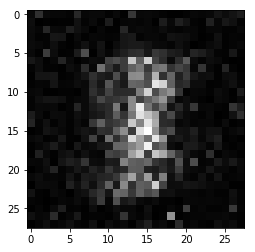

Number batches 78
8(0/78) D: 0.4566, G: 1.2401
8(1/78) D: 0.4817, G: 1.9401
8(2/78) D: 0.4760, G: 1.0175
8(3/78) D: 0.5213, G: 2.2618
8(4/78) D: 0.4793, G: 1.1369
8(5/78) D: 0.3966, G: 2.1088
8(6/78) D: 0.3711, G: 1.6354
8(7/78) D: 0.3541, G: 2.0131
8(8/78) D: 0.4054, G: 1.2286
8(9/78) D: 0.4348, G: 2.5495
8(10/78) D: 0.4589, G: 0.7838
8(11/78) D: 0.5745, G: 2.8017
8(12/78) D: 0.5761, G: 1.2301
8(13/78) D: 0.4833, G: 2.0528
8(14/78) D: 0.3089, G: 2.1896
8(15/78) D: 0.2641, G: 1.8311
8(16/78) D: 0.2862, G: 2.3350
8(17/78) D: 0.3001, G: 1.6911
8(18/78) D: 0.4399, G: 1.9705
8(19/78) D: 0.4837, G: 1.4920
8(20/78) D: 0.4011, G: 2.6549
8(21/78) D: 0.4106, G: 0.8948
8(22/78) D: 0.5109, G: 3.3602
8(23/78) D: 0.5168, G: 1.2263
8(24/78) D: 0.3823, G: 2.0899
8(25/78) D: 0.2409, G: 2.5466
8(26/78) D: 0.2673, G: 1.5866
8(27/78) D: 0.3144, G: 2.4195
8(28/78) D: 0.2702, G: 2.0627
8(29/78) D: 0.2709, G: 2.1406
8(30/78) D: 0.3255, G: 1.9123
8(31/78) D: 0.3338, G: 2.2048
8(32/78) D: 0.3435, G: 1.6825
8(

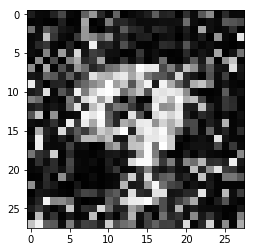

Number batches 78
9(0/78) D: 0.3466, G: 2.0251
9(1/78) D: 0.3267, G: 2.1032
9(2/78) D: 0.3191, G: 2.2888
9(3/78) D: 0.3091, G: 2.3441
9(4/78) D: 0.3194, G: 2.3180
9(5/78) D: 0.3128, G: 2.5870
9(6/78) D: 0.3119, G: 1.6837
9(7/78) D: 0.3883, G: 4.4179
9(8/78) D: 0.7941, G: 0.1441
9(9/78) D: 1.5881, G: 1.5172
9(10/78) D: 0.3688, G: 3.7485
9(11/78) D: 0.4598, G: 2.6983
9(12/78) D: 0.3155, G: 1.4761
9(13/78) D: 0.3354, G: 1.3463
9(14/78) D: 0.3483, G: 2.2612
9(15/78) D: 0.2955, G: 2.2449
9(16/78) D: 0.3130, G: 1.7502
9(17/78) D: 0.3474, G: 2.0470
9(18/78) D: 0.3494, G: 1.8195
9(19/78) D: 0.4065, G: 2.0568
9(20/78) D: 0.4493, G: 1.3898
9(21/78) D: 0.5029, G: 2.7607
9(22/78) D: 0.4899, G: 1.0107
9(23/78) D: 0.5455, G: 3.1838
9(24/78) D: 0.6069, G: 0.6612
9(25/78) D: 0.6995, G: 2.4820
9(26/78) D: 0.3593, G: 2.2007
9(27/78) D: 0.3316, G: 1.4456
9(28/78) D: 0.3630, G: 2.5180
9(29/78) D: 0.3720, G: 1.6053
9(30/78) D: 0.4528, G: 1.5664
9(31/78) D: 0.3788, G: 2.3139
9(32/78) D: 0.3990, G: 1.3629
9(

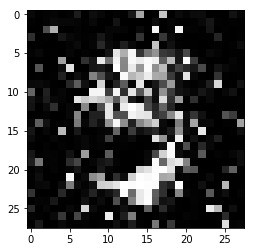

Number batches 78
10(0/78) D: 0.3380, G: 1.7204
10(1/78) D: 0.3348, G: 2.0469
10(2/78) D: 0.2832, G: 2.0397
10(3/78) D: 0.2981, G: 1.8802
10(4/78) D: 0.3174, G: 1.8473
10(5/78) D: 0.2920, G: 2.2200
10(6/78) D: 0.2822, G: 1.8931
10(7/78) D: 0.3177, G: 2.3355
10(8/78) D: 0.3371, G: 1.5743
10(9/78) D: 0.3855, G: 3.2495
10(10/78) D: 0.4211, G: 1.3800
10(11/78) D: 0.4911, G: 2.4380
10(12/78) D: 0.3790, G: 2.3635
10(13/78) D: 0.3085, G: 2.0520
10(14/78) D: 0.3419, G: 2.8060
10(15/78) D: 0.3009, G: 2.0774
10(16/78) D: 0.3316, G: 2.1881
10(17/78) D: 0.3809, G: 2.0555
10(18/78) D: 0.4097, G: 2.6752
10(19/78) D: 0.4042, G: 1.2491
10(20/78) D: 0.5353, G: 3.7714
10(21/78) D: 0.8090, G: 0.4108
10(22/78) D: 1.0504, G: 2.7165
10(23/78) D: 0.2814, G: 2.8126
10(24/78) D: 0.2903, G: 1.4459
10(25/78) D: 0.4324, G: 2.6649
10(26/78) D: 0.4086, G: 1.4457
10(27/78) D: 0.4140, G: 1.9134
10(28/78) D: 0.4111, G: 1.6005
10(29/78) D: 0.3894, G: 1.8729
10(30/78) D: 0.4308, G: 1.8471
10(31/78) D: 0.3927, G: 1.6847


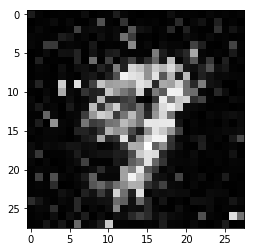

Number batches 78
11(0/78) D: 0.4559, G: 3.0279
11(1/78) D: 0.4912, G: 0.9414
11(2/78) D: 0.5007, G: 2.6187
11(3/78) D: 0.4885, G: 1.4493
11(4/78) D: 0.3850, G: 1.7162
11(5/78) D: 0.3309, G: 2.2209
11(6/78) D: 0.3334, G: 1.7147
11(7/78) D: 0.3600, G: 1.7260
11(8/78) D: 0.3794, G: 1.7740
11(9/78) D: 0.3916, G: 2.0450
11(10/78) D: 0.3354, G: 1.8011
11(11/78) D: 0.3965, G: 1.6431
11(12/78) D: 0.4110, G: 1.7500
11(13/78) D: 0.3990, G: 1.6189
11(14/78) D: 0.3926, G: 1.8902
11(15/78) D: 0.3806, G: 1.9201
11(16/78) D: 0.3733, G: 1.6305
11(17/78) D: 0.3521, G: 2.2015
11(18/78) D: 0.4580, G: 1.1909
11(19/78) D: 0.4442, G: 2.6614
11(20/78) D: 0.4107, G: 1.3768
11(21/78) D: 0.3716, G: 2.3404
11(22/78) D: 0.3729, G: 1.5159
11(23/78) D: 0.3752, G: 2.0508
11(24/78) D: 0.3280, G: 1.9782
11(25/78) D: 0.3303, G: 1.8968
11(26/78) D: 0.3278, G: 2.2748
11(27/78) D: 0.3576, G: 1.4506
11(28/78) D: 0.3630, G: 3.5338
11(29/78) D: 0.4964, G: 0.6063
11(30/78) D: 0.7129, G: 3.8541
11(31/78) D: 0.6240, G: 1.8978


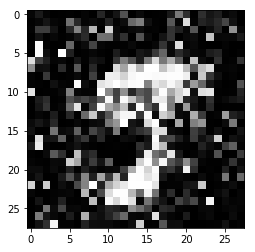

Number batches 78
12(0/78) D: 0.3526, G: 2.0861
12(1/78) D: 0.3899, G: 1.3723
12(2/78) D: 0.3910, G: 2.9454
12(3/78) D: 0.4192, G: 1.0827
12(4/78) D: 0.5133, G: 3.6196
12(5/78) D: 0.7442, G: 0.4647
12(6/78) D: 0.7466, G: 2.6952
12(7/78) D: 0.3619, G: 2.3025
12(8/78) D: 0.3707, G: 1.1326
12(9/78) D: 0.4365, G: 1.4352
12(10/78) D: 0.4170, G: 2.1800
12(11/78) D: 0.3711, G: 1.4065
12(12/78) D: 0.3603, G: 1.7014
12(13/78) D: 0.3426, G: 2.0688
12(14/78) D: 0.3195, G: 1.6468
12(15/78) D: 0.3219, G: 2.0192
12(16/78) D: 0.3258, G: 1.6259
12(17/78) D: 0.2780, G: 2.3131
12(18/78) D: 0.5109, G: 0.8670
12(19/78) D: 0.5275, G: 2.7072
12(20/78) D: 0.4172, G: 1.5286
12(21/78) D: 0.3537, G: 1.6068
12(22/78) D: 0.3447, G: 2.4115
12(23/78) D: 0.4060, G: 1.0959
12(24/78) D: 0.4813, G: 2.7742
12(25/78) D: 0.4710, G: 0.8332
12(26/78) D: 0.5625, G: 2.7006
12(27/78) D: 0.5407, G: 1.0566
12(28/78) D: 0.4451, G: 1.7940
12(29/78) D: 0.4114, G: 1.6138
12(30/78) D: 0.4036, G: 1.4988
12(31/78) D: 0.4087, G: 1.7330


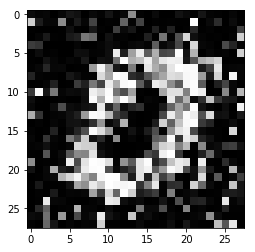

Number batches 78
13(0/78) D: 0.5703, G: 0.9395
13(1/78) D: 0.5208, G: 2.6369
13(2/78) D: 0.4446, G: 1.4767
13(3/78) D: 0.3658, G: 1.9881
13(4/78) D: 0.3745, G: 1.6667
13(5/78) D: 0.3738, G: 1.9263
13(6/78) D: 0.3285, G: 2.0358
13(7/78) D: 0.3581, G: 1.6391
13(8/78) D: 0.4095, G: 2.0960
13(9/78) D: 0.3835, G: 1.4974
13(10/78) D: 0.3847, G: 2.8260
13(11/78) D: 0.5751, G: 0.5498
13(12/78) D: 0.7082, G: 3.3257
13(13/78) D: 0.5569, G: 1.2200
13(14/78) D: 0.3752, G: 1.8012
13(15/78) D: 0.2693, G: 2.6779
13(16/78) D: 0.2728, G: 2.0077
13(17/78) D: 0.2647, G: 1.9369
13(18/78) D: 0.2924, G: 2.3053
13(19/78) D: 0.3078, G: 1.9771
13(20/78) D: 0.3228, G: 2.2830
13(21/78) D: 0.3737, G: 1.7585
13(22/78) D: 0.3946, G: 2.4175
13(23/78) D: 0.4335, G: 0.8031
13(24/78) D: 0.5619, G: 4.0511
13(25/78) D: 0.6894, G: 0.4216
13(26/78) D: 0.7605, G: 2.5504
13(27/78) D: 0.3389, G: 2.7518
13(28/78) D: 0.3477, G: 1.4964
13(29/78) D: 0.3650, G: 2.1318
13(30/78) D: 0.3425, G: 2.0869
13(31/78) D: 0.3143, G: 1.7845


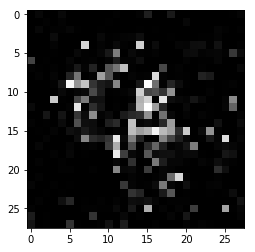

Number batches 78
14(0/78) D: 0.3956, G: 1.4562
14(1/78) D: 0.3833, G: 1.9863
14(2/78) D: 0.3947, G: 1.3678
14(3/78) D: 0.3964, G: 2.2224
14(4/78) D: 0.4499, G: 0.9228
14(5/78) D: 0.5136, G: 2.6973
14(6/78) D: 0.5291, G: 0.8276
14(7/78) D: 0.5634, G: 2.8023
14(8/78) D: 0.5731, G: 0.8992
14(9/78) D: 0.5572, G: 2.0927
14(10/78) D: 0.4316, G: 1.5933
14(11/78) D: 0.3562, G: 1.7742
14(12/78) D: 0.3681, G: 1.7816
14(13/78) D: 0.4035, G: 1.4295
14(14/78) D: 0.4223, G: 2.1232
14(15/78) D: 0.4182, G: 1.1195
14(16/78) D: 0.3985, G: 2.7375
14(17/78) D: 0.4069, G: 1.2446
14(18/78) D: 0.4889, G: 2.2975
14(19/78) D: 0.4449, G: 1.1489
14(20/78) D: 0.4728, G: 2.8664
14(21/78) D: 0.4633, G: 1.0575
14(22/78) D: 0.4287, G: 2.5817
14(23/78) D: 0.4323, G: 1.2163
14(24/78) D: 0.4256, G: 2.1072
14(25/78) D: 0.4738, G: 1.2404
14(26/78) D: 0.4758, G: 2.3236
14(27/78) D: 0.4009, G: 1.4430
14(28/78) D: 0.3777, G: 2.0749
14(29/78) D: 0.4127, G: 1.4302
14(30/78) D: 0.4090, G: 2.1407
14(31/78) D: 0.4162, G: 1.4520


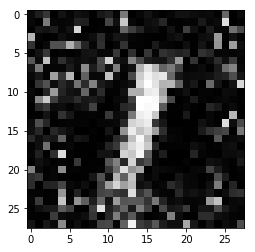

Number batches 78
15(0/78) D: 0.4393, G: 1.0604
15(1/78) D: 0.3978, G: 2.6838
15(2/78) D: 0.3296, G: 1.6121
15(3/78) D: 0.3137, G: 1.9853
15(4/78) D: 0.3285, G: 1.8172
15(5/78) D: 0.3186, G: 2.0351
15(6/78) D: 0.3039, G: 2.1206
15(7/78) D: 0.3880, G: 1.4104
15(8/78) D: 0.4270, G: 2.2532
15(9/78) D: 0.3678, G: 1.5216
15(10/78) D: 0.3749, G: 2.8424
15(11/78) D: 0.6222, G: 0.5164
15(12/78) D: 0.7494, G: 2.9787
15(13/78) D: 0.5158, G: 1.7352
15(14/78) D: 0.3362, G: 1.6920
15(15/78) D: 0.2952, G: 2.3778
15(16/78) D: 0.3460, G: 1.6164
15(17/78) D: 0.3219, G: 1.9783
15(18/78) D: 0.4170, G: 1.6562
15(19/78) D: 0.3767, G: 1.9710
15(20/78) D: 0.3232, G: 2.3569
15(21/78) D: 0.3823, G: 1.4022
15(22/78) D: 0.3779, G: 2.4304
15(23/78) D: 0.3423, G: 1.7247
15(24/78) D: 0.3302, G: 2.4764
15(25/78) D: 0.3230, G: 2.0239
15(26/78) D: 0.3105, G: 2.2036
15(27/78) D: 0.3023, G: 2.2468
15(28/78) D: 0.2840, G: 2.7210
15(29/78) D: 0.3020, G: 1.3945
15(30/78) D: 0.3766, G: 3.8512
15(31/78) D: 0.5212, G: 0.5334


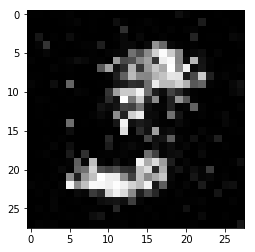

Number batches 78
16(0/78) D: 0.3045, G: 2.1736
16(1/78) D: 0.3453, G: 1.8818
16(2/78) D: 0.3648, G: 2.3558
16(3/78) D: 0.3788, G: 1.5899
16(4/78) D: 0.4254, G: 2.2347
16(5/78) D: 0.4076, G: 1.7000
16(6/78) D: 0.3972, G: 2.2878
16(7/78) D: 0.4007, G: 1.7132
16(8/78) D: 0.4404, G: 1.7811
16(9/78) D: 0.4000, G: 2.3210
16(10/78) D: 0.3663, G: 1.4935
16(11/78) D: 0.3763, G: 2.7508
16(12/78) D: 0.5335, G: 0.5664
16(13/78) D: 0.7442, G: 3.7073
16(14/78) D: 0.6770, G: 1.5102
16(15/78) D: 0.3699, G: 1.8189
16(16/78) D: 0.3070, G: 2.4165
16(17/78) D: 0.3826, G: 1.1365
16(18/78) D: 0.4005, G: 2.2026
16(19/78) D: 0.2852, G: 2.4068
16(20/78) D: 0.3288, G: 1.2910
16(21/78) D: 0.3660, G: 2.0625
16(22/78) D: 0.3525, G: 1.8361
16(23/78) D: 0.2973, G: 1.7523
16(24/78) D: 0.3283, G: 1.8717
16(25/78) D: 0.3218, G: 1.7572
16(26/78) D: 0.2978, G: 2.3764
16(27/78) D: 0.3552, G: 1.6799
16(28/78) D: 0.3442, G: 2.1708
16(29/78) D: 0.3276, G: 1.7181
16(30/78) D: 0.3297, G: 2.0289
16(31/78) D: 0.3488, G: 1.5815


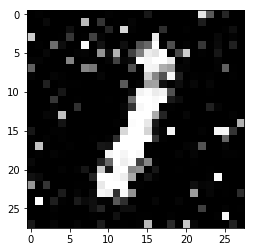

Number batches 78
17(0/78) D: 0.4970, G: 1.0107
17(1/78) D: 0.4428, G: 3.0423
17(2/78) D: 0.3091, G: 2.2030
17(3/78) D: 0.2988, G: 1.5418
17(4/78) D: 0.3235, G: 2.6825
17(5/78) D: 0.3115, G: 1.4821
17(6/78) D: 0.3369, G: 2.7308
17(7/78) D: 0.2853, G: 1.9191
17(8/78) D: 0.3464, G: 1.8611
17(9/78) D: 0.3803, G: 1.9729
17(10/78) D: 0.3317, G: 2.1942
17(11/78) D: 0.4091, G: 1.5178
17(12/78) D: 0.3938, G: 2.7134
17(13/78) D: 0.4061, G: 1.2447
17(14/78) D: 0.4395, G: 3.7284
17(15/78) D: 0.3953, G: 1.3418
17(16/78) D: 0.4165, G: 2.8473
17(17/78) D: 0.2473, G: 2.2622
17(18/78) D: 0.3366, G: 1.5010
17(19/78) D: 0.3458, G: 2.6459
17(20/78) D: 0.3217, G: 1.6812
17(21/78) D: 0.3535, G: 2.4211
17(22/78) D: 0.3295, G: 1.8618
17(23/78) D: 0.3404, G: 1.7624
17(24/78) D: 0.3661, G: 2.0933
17(25/78) D: 0.3474, G: 1.3014
17(26/78) D: 0.4280, G: 3.4375
17(27/78) D: 0.5544, G: 0.4417
17(28/78) D: 0.7400, G: 4.0359
17(29/78) D: 0.5828, G: 1.7406
17(30/78) D: 0.3258, G: 1.8629
17(31/78) D: 0.2932, G: 2.5198


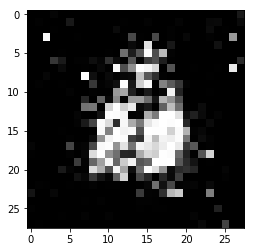

Number batches 78
18(0/78) D: 0.3905, G: 2.6587
18(1/78) D: 0.3297, G: 1.7390
18(2/78) D: 0.3157, G: 2.6471
18(3/78) D: 0.3225, G: 1.3715
18(4/78) D: 0.3816, G: 3.3170
18(5/78) D: 0.4689, G: 0.7958
18(6/78) D: 0.5369, G: 3.6478
18(7/78) D: 0.3889, G: 1.8494
18(8/78) D: 0.3403, G: 1.3883
18(9/78) D: 0.3556, G: 2.9181
18(10/78) D: 0.3732, G: 1.2559
18(11/78) D: 0.3647, G: 2.9666
18(12/78) D: 0.3847, G: 1.1834
18(13/78) D: 0.4224, G: 2.5524
18(14/78) D: 0.3551, G: 1.5502
18(15/78) D: 0.3305, G: 2.3080
18(16/78) D: 0.3236, G: 1.8944
18(17/78) D: 0.2909, G: 2.0958
18(18/78) D: 0.3673, G: 1.6814
18(19/78) D: 0.3453, G: 2.2638
18(20/78) D: 0.3401, G: 1.3965
18(21/78) D: 0.4180, G: 2.8287
18(22/78) D: 0.4302, G: 0.9877
18(23/78) D: 0.4339, G: 3.2669
18(24/78) D: 0.4774, G: 1.1478
18(25/78) D: 0.4723, G: 3.1941
18(26/78) D: 0.3671, G: 1.7474
18(27/78) D: 0.2878, G: 2.2295
18(28/78) D: 0.3269, G: 2.1872
18(29/78) D: 0.2814, G: 2.1238
18(30/78) D: 0.3063, G: 2.0187
18(31/78) D: 0.3115, G: 2.6311


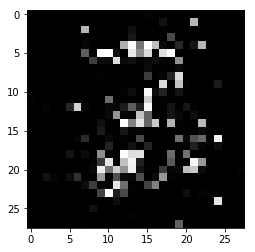

Number batches 78
19(0/78) D: 0.3078, G: 1.9848
19(1/78) D: 0.3251, G: 2.3501
19(2/78) D: 0.3414, G: 1.7766
19(3/78) D: 0.3620, G: 1.9540
19(4/78) D: 0.3743, G: 1.8680
19(5/78) D: 0.3516, G: 2.3815
19(6/78) D: 0.3437, G: 1.4685
19(7/78) D: 0.4223, G: 2.9185
19(8/78) D: 0.5060, G: 0.7001
19(9/78) D: 0.6893, G: 3.4815
19(10/78) D: 0.4866, G: 1.7827
19(11/78) D: 0.3206, G: 1.5698
19(12/78) D: 0.3081, G: 2.5370
19(13/78) D: 0.3587, G: 1.4534
19(14/78) D: 0.3696, G: 2.4732
19(15/78) D: 0.3231, G: 2.1541
19(16/78) D: 0.3283, G: 1.7085
19(17/78) D: 0.3225, G: 2.5408
19(18/78) D: 0.3318, G: 1.5133
19(19/78) D: 0.3446, G: 2.8805
19(20/78) D: 0.3459, G: 1.5079
19(21/78) D: 0.3877, G: 2.5393
19(22/78) D: 0.3759, G: 1.3185
19(23/78) D: 0.4023, G: 2.6088
19(24/78) D: 0.3858, G: 1.5042
19(25/78) D: 0.3651, G: 2.8414
19(26/78) D: 0.4000, G: 1.1573
19(27/78) D: 0.4494, G: 2.9012
19(28/78) D: 0.4870, G: 0.8694
19(29/78) D: 0.5054, G: 3.2387
19(30/78) D: 0.3859, G: 1.9071
19(31/78) D: 0.3053, G: 2.1448


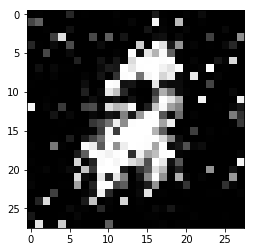

Number batches 78
20(0/78) D: 0.3908, G: 0.9501
20(1/78) D: 0.4328, G: 3.7904
20(2/78) D: 0.5165, G: 1.1343
20(3/78) D: 0.4339, G: 2.8340
20(4/78) D: 0.3674, G: 1.3768
20(5/78) D: 0.3700, G: 2.4194
20(6/78) D: 0.3429, G: 1.6361
20(7/78) D: 0.3342, G: 2.1677
20(8/78) D: 0.3981, G: 1.0845
20(9/78) D: 0.5429, G: 2.6270
20(10/78) D: 0.4340, G: 1.4507
20(11/78) D: 0.4050, G: 2.7017
20(12/78) D: 0.3586, G: 1.5570
20(13/78) D: 0.3456, G: 1.6877
20(14/78) D: 0.3221, G: 2.7027
20(15/78) D: 0.3056, G: 1.8021
20(16/78) D: 0.3013, G: 2.2744
20(17/78) D: 0.3041, G: 2.0990
20(18/78) D: 0.4209, G: 1.0331
20(19/78) D: 0.4467, G: 3.5089
20(20/78) D: 0.4124, G: 1.6299
20(21/78) D: 0.3464, G: 1.6073
20(22/78) D: 0.3415, G: 2.8582
20(23/78) D: 0.3222, G: 1.6768
20(24/78) D: 0.3112, G: 1.8676
20(25/78) D: 0.3733, G: 2.1702
20(26/78) D: 0.3303, G: 1.8598
20(27/78) D: 0.3530, G: 1.7713
20(28/78) D: 0.3494, G: 1.8932
20(29/78) D: 0.3386, G: 2.2687
20(30/78) D: 0.3960, G: 1.0713
20(31/78) D: 0.4428, G: 3.2307


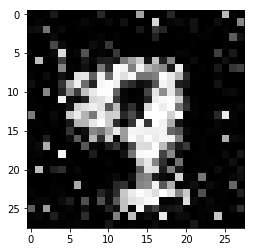

Number batches 78
21(0/78) D: 0.6549, G: 3.6300
21(1/78) D: 0.5066, G: 1.4748
21(2/78) D: 0.4205, G: 2.0971
21(3/78) D: 0.3087, G: 2.2247
21(4/78) D: 0.3428, G: 1.7307
21(5/78) D: 0.3561, G: 1.9794
21(6/78) D: 0.3863, G: 1.9967
21(7/78) D: 0.3868, G: 1.6414
21(8/78) D: 0.3934, G: 1.7227
21(9/78) D: 0.3871, G: 2.2033
21(10/78) D: 0.3626, G: 1.4954
21(11/78) D: 0.3778, G: 2.7731
21(12/78) D: 0.4428, G: 0.6362
21(13/78) D: 0.6470, G: 3.9856
21(14/78) D: 0.7023, G: 0.9154
21(15/78) D: 0.5104, G: 2.0040
21(16/78) D: 0.3008, G: 2.8092
21(17/78) D: 0.3721, G: 1.5356
21(18/78) D: 0.3387, G: 1.6337
21(19/78) D: 0.3127, G: 2.1076
21(20/78) D: 0.3206, G: 1.6392
21(21/78) D: 0.3210, G: 2.3975
21(22/78) D: 0.3661, G: 1.4958
21(23/78) D: 0.3666, G: 2.0762
21(24/78) D: 0.3777, G: 1.4844
21(25/78) D: 0.3790, G: 2.3842
21(26/78) D: 0.3555, G: 1.4699
21(27/78) D: 0.3854, G: 2.0915
21(28/78) D: 0.3847, G: 1.4531
21(29/78) D: 0.3513, G: 2.5422
21(30/78) D: 0.4114, G: 1.1225
21(31/78) D: 0.4505, G: 3.0066


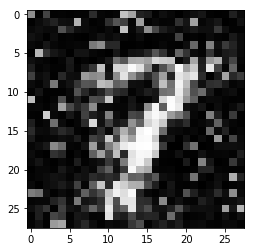

Number batches 78
22(0/78) D: 0.3347, G: 2.2672
22(1/78) D: 0.3161, G: 1.8741
22(2/78) D: 0.3524, G: 1.8326
22(3/78) D: 0.3272, G: 1.9625
22(4/78) D: 0.3278, G: 2.0586
22(5/78) D: 0.3502, G: 2.0559
22(6/78) D: 0.3497, G: 1.2714
22(7/78) D: 0.4030, G: 4.0655
22(8/78) D: 0.6555, G: 0.3126
22(9/78) D: 0.9258, G: 4.1168
22(10/78) D: 0.5111, G: 2.7442
22(11/78) D: 0.3057, G: 1.2025
22(12/78) D: 0.3687, G: 2.1728
22(13/78) D: 0.2668, G: 2.5418
22(14/78) D: 0.2299, G: 2.0440
22(15/78) D: 0.2381, G: 1.7986
22(16/78) D: 0.2663, G: 2.1752
22(17/78) D: 0.2569, G: 2.1106
22(18/78) D: 0.2851, G: 1.9169
22(19/78) D: 0.2791, G: 2.2555
22(20/78) D: 0.2437, G: 1.8421
22(21/78) D: 0.2888, G: 2.0179
22(22/78) D: 0.2684, G: 2.3656
22(23/78) D: 0.3241, G: 1.3407
22(24/78) D: 0.3421, G: 2.7381
22(25/78) D: 0.3904, G: 1.0180
22(26/78) D: 0.4090, G: 3.2307
22(27/78) D: 0.3563, G: 1.7291
22(28/78) D: 0.2701, G: 2.3413
22(29/78) D: 0.2159, G: 2.4362
22(30/78) D: 0.2610, G: 1.9342
22(31/78) D: 0.2437, G: 2.2884


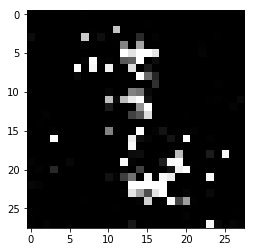

Number batches 78
23(0/78) D: 1.0427, G: 0.4725
23(1/78) D: 0.8102, G: 3.6150
23(2/78) D: 0.4275, G: 2.3781
23(3/78) D: 0.3197, G: 1.5665
23(4/78) D: 0.3798, G: 2.7636
23(5/78) D: 0.3334, G: 1.9310
23(6/78) D: 0.3187, G: 2.2998
23(7/78) D: 0.3620, G: 2.0401
23(8/78) D: 0.4079, G: 2.0305
23(9/78) D: 0.3936, G: 1.8230
23(10/78) D: 0.4368, G: 2.5370
23(11/78) D: 0.4214, G: 1.2017
23(12/78) D: 0.4247, G: 3.2236
23(13/78) D: 0.5008, G: 0.8625
23(14/78) D: 0.5394, G: 3.5579
23(15/78) D: 0.4157, G: 1.7031
23(16/78) D: 0.3014, G: 2.0208
23(17/78) D: 0.2443, G: 2.8926
23(18/78) D: 0.4064, G: 1.0077
23(19/78) D: 0.4356, G: 3.0920
23(20/78) D: 0.3822, G: 1.7768
23(21/78) D: 0.3705, G: 1.6736
23(22/78) D: 0.3461, G: 2.4252
23(23/78) D: 0.4038, G: 1.3116
23(24/78) D: 0.3869, G: 2.8214
23(25/78) D: 0.3063, G: 1.6691
23(26/78) D: 0.3033, G: 2.3620
23(27/78) D: 0.3084, G: 2.0106
23(28/78) D: 0.3138, G: 2.0656
23(29/78) D: 0.3166, G: 1.5325
23(30/78) D: 0.3580, G: 2.7537
23(31/78) D: 0.2769, G: 1.7649


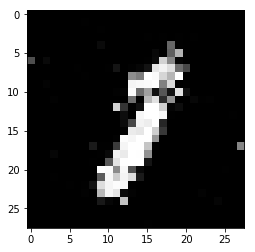

Number batches 78
24(0/78) D: 0.2911, G: 1.6487
24(1/78) D: 0.2692, G: 2.6003
24(2/78) D: 0.1915, G: 2.3950
24(3/78) D: 0.2354, G: 1.8961
24(4/78) D: 0.2692, G: 2.6853
24(5/78) D: 0.2263, G: 2.3631
24(6/78) D: 0.2653, G: 2.7384
24(7/78) D: 0.2724, G: 2.0920
24(8/78) D: 0.2945, G: 2.0812
24(9/78) D: 0.2736, G: 3.4630
24(10/78) D: 0.3609, G: 0.8233
24(11/78) D: 0.5771, G: 5.6604
24(12/78) D: 0.8866, G: 0.6867
24(13/78) D: 0.6234, G: 3.0483
24(14/78) D: 0.2407, G: 3.1322
24(15/78) D: 0.2531, G: 2.3140
24(16/78) D: 0.2095, G: 2.2691
24(17/78) D: 0.1785, G: 2.7861
24(18/78) D: 0.2394, G: 2.4991
24(19/78) D: 0.2146, G: 2.2476
24(20/78) D: 0.2420, G: 2.3044
24(21/78) D: 0.2702, G: 2.4100
24(22/78) D: 0.3125, G: 1.7897
24(23/78) D: 0.3185, G: 2.5599
24(24/78) D: 0.3378, G: 1.7016
24(25/78) D: 0.2857, G: 2.6370
24(26/78) D: 0.3307, G: 1.6532
24(27/78) D: 0.3161, G: 2.5610
24(28/78) D: 0.2798, G: 1.7313
24(29/78) D: 0.2815, G: 2.7313
24(30/78) D: 0.3366, G: 1.7413
24(31/78) D: 0.2752, G: 2.8572


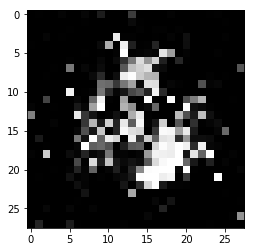

Number batches 78
25(0/78) D: 0.6243, G: 0.8760
25(1/78) D: 0.5314, G: 4.0080
25(2/78) D: 0.3800, G: 2.2299
25(3/78) D: 0.2197, G: 1.5885
25(4/78) D: 0.3360, G: 3.2481
25(5/78) D: 0.2744, G: 2.2345
25(6/78) D: 0.2539, G: 2.1661
25(7/78) D: 0.2556, G: 2.4156
25(8/78) D: 0.2878, G: 1.9007
25(9/78) D: 0.2959, G: 3.0953
25(10/78) D: 0.2964, G: 1.6361
25(11/78) D: 0.3615, G: 2.0493
25(12/78) D: 0.3011, G: 2.5380
25(13/78) D: 0.3423, G: 1.3601
25(14/78) D: 0.3131, G: 3.0956
25(15/78) D: 0.2809, G: 2.1042
25(16/78) D: 0.2610, G: 2.2549
25(17/78) D: 0.2093, G: 3.1617
25(18/78) D: 0.6521, G: 0.4395
25(19/78) D: 0.8751, G: 4.6399
25(20/78) D: 0.6584, G: 2.6418
25(21/78) D: 0.3514, G: 1.1685
25(22/78) D: 0.4336, G: 2.5085
25(23/78) D: 0.3221, G: 2.6870
25(24/78) D: 0.3036, G: 1.5608
25(25/78) D: 0.3483, G: 2.1927
25(26/78) D: 0.3070, G: 2.3603
25(27/78) D: 0.3051, G: 1.9059
25(28/78) D: 0.2794, G: 2.7766
25(29/78) D: 0.2962, G: 1.8478
25(30/78) D: 0.4109, G: 2.0611
25(31/78) D: 0.3204, G: 2.1697


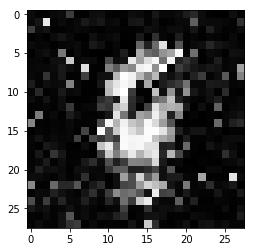

Number batches 78
26(0/78) D: 0.3182, G: 1.6267
26(1/78) D: 0.3792, G: 4.3908
26(2/78) D: 0.4274, G: 1.7615
26(3/78) D: 0.3078, G: 3.1934
26(4/78) D: 0.2059, G: 3.0228
26(5/78) D: 0.2219, G: 2.1687
26(6/78) D: 0.2258, G: 3.6582
26(7/78) D: 0.1704, G: 2.8867
26(8/78) D: 0.2780, G: 1.9517
26(9/78) D: 0.2596, G: 3.4053
26(10/78) D: 0.2785, G: 2.6871
26(11/78) D: 0.2416, G: 2.2184
26(12/78) D: 0.2306, G: 3.7041
26(13/78) D: 0.2187, G: 2.3376
26(14/78) D: 0.2172, G: 3.0068
26(15/78) D: 0.1983, G: 2.7310
26(16/78) D: 0.2410, G: 2.7012
26(17/78) D: 0.2255, G: 3.1287
26(18/78) D: 0.2960, G: 1.7811
26(19/78) D: 0.3311, G: 4.5940
26(20/78) D: 0.4510, G: 0.8039
26(21/78) D: 0.6152, G: 5.7301
26(22/78) D: 0.5528, G: 2.2369
26(23/78) D: 0.2432, G: 1.9143
26(24/78) D: 0.3081, G: 3.7725
26(25/78) D: 0.4539, G: 1.2816
26(26/78) D: 0.4330, G: 3.5620
26(27/78) D: 0.3890, G: 1.9311
26(28/78) D: 0.3378, G: 2.8700
26(29/78) D: 0.2803, G: 2.3748
26(30/78) D: 0.2515, G: 2.2943
26(31/78) D: 0.2503, G: 3.1546


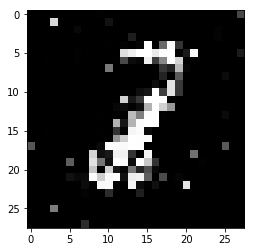

Number batches 78
27(0/78) D: 0.3100, G: 2.1638
27(1/78) D: 0.2828, G: 2.2792
27(2/78) D: 0.3193, G: 2.5002
27(3/78) D: 0.3162, G: 1.3109
27(4/78) D: 0.4197, G: 4.6526
27(5/78) D: 0.4244, G: 1.1753
27(6/78) D: 0.3527, G: 3.5842
27(7/78) D: 0.2869, G: 1.8370
27(8/78) D: 0.2412, G: 1.7884
27(9/78) D: 0.2319, G: 3.5884
27(10/78) D: 0.2288, G: 2.6166
27(11/78) D: 0.2928, G: 1.7392
27(12/78) D: 0.2754, G: 3.2837
27(13/78) D: 0.3104, G: 1.3200
27(14/78) D: 0.3400, G: 3.5830
27(15/78) D: 0.2970, G: 1.8011
27(16/78) D: 0.2738, G: 3.0293
27(17/78) D: 0.1996, G: 2.4982
27(18/78) D: 0.3046, G: 1.6214
27(19/78) D: 0.2867, G: 3.2464
27(20/78) D: 0.3455, G: 1.0474
27(21/78) D: 0.4692, G: 3.9682
27(22/78) D: 0.4103, G: 1.7756
27(23/78) D: 0.2907, G: 1.8993
27(24/78) D: 0.2864, G: 2.4371
27(25/78) D: 0.2472, G: 2.3011
27(26/78) D: 0.2538, G: 1.8721
27(27/78) D: 0.2645, G: 2.6465
27(28/78) D: 0.2465, G: 1.9962
27(29/78) D: 0.3278, G: 2.4149
27(30/78) D: 0.3784, G: 1.7378
27(31/78) D: 0.3124, G: 2.5296


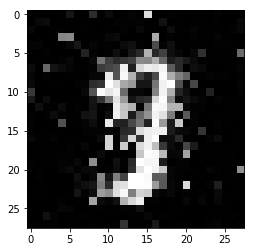

Number batches 78
28(0/78) D: 0.2686, G: 2.7124
28(1/78) D: 0.2947, G: 1.4871
28(2/78) D: 0.2865, G: 3.0936
28(3/78) D: 0.3151, G: 1.6658
28(4/78) D: 0.2545, G: 3.1685
28(5/78) D: 0.2510, G: 2.0716
28(6/78) D: 0.1939, G: 2.7064
28(7/78) D: 0.1974, G: 2.9545
28(8/78) D: 0.2527, G: 1.6732
28(9/78) D: 0.2631, G: 2.6855
28(10/78) D: 0.2036, G: 2.6713
28(11/78) D: 0.2129, G: 2.2602
28(12/78) D: 0.2276, G: 2.5617
28(13/78) D: 0.2239, G: 1.8113
28(14/78) D: 0.2197, G: 3.6881
28(15/78) D: 0.2951, G: 1.4118
28(16/78) D: 0.3016, G: 3.4876
28(17/78) D: 0.2263, G: 2.1792
28(18/78) D: 0.2232, G: 2.4192
28(19/78) D: 0.2008, G: 2.6974
28(20/78) D: 0.2440, G: 2.1325
28(21/78) D: 0.2719, G: 2.2933
28(22/78) D: 0.2569, G: 2.1198
28(23/78) D: 0.2685, G: 2.6314
28(24/78) D: 0.2573, G: 1.6343
28(25/78) D: 0.3026, G: 3.7884
28(26/78) D: 0.3620, G: 1.0813
28(27/78) D: 0.4017, G: 4.0601
28(28/78) D: 0.3688, G: 1.8093
28(29/78) D: 0.3291, G: 3.5117
28(30/78) D: 0.2769, G: 2.1425
28(31/78) D: 0.2474, G: 2.3774


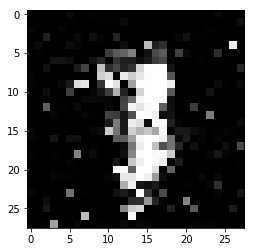

Number batches 78
29(0/78) D: 0.2642, G: 2.2035
29(1/78) D: 0.2911, G: 2.1088
29(2/78) D: 0.2621, G: 2.7385
29(3/78) D: 0.3005, G: 1.6663
29(4/78) D: 0.3318, G: 2.8825
29(5/78) D: 0.3683, G: 1.4102
29(6/78) D: 0.3765, G: 4.0618
29(7/78) D: 0.4357, G: 1.5472
29(8/78) D: 0.3540, G: 2.5676
29(9/78) D: 0.3306, G: 2.0975
29(10/78) D: 0.2849, G: 2.3685
29(11/78) D: 0.2291, G: 2.6320
29(12/78) D: 0.2862, G: 1.9722
29(13/78) D: 0.2594, G: 2.6852
29(14/78) D: 0.2282, G: 2.1499
29(15/78) D: 0.2556, G: 2.6244
29(16/78) D: 0.2685, G: 1.7877
29(17/78) D: 0.2651, G: 2.9564
29(18/78) D: 0.2585, G: 2.1869
29(19/78) D: 0.2415, G: 2.1173
29(20/78) D: 0.2622, G: 3.7292
29(21/78) D: 0.3991, G: 1.0538
29(22/78) D: 0.4051, G: 3.8007
29(23/78) D: 0.4534, G: 1.0364
29(24/78) D: 0.3856, G: 2.9546
29(25/78) D: 0.2408, G: 2.4842
29(26/78) D: 0.2428, G: 2.2582
29(27/78) D: 0.2283, G: 2.1451
29(28/78) D: 0.2236, G: 2.5516
29(29/78) D: 0.2343, G: 2.0770
29(30/78) D: 0.2536, G: 2.3559
29(31/78) D: 0.2214, G: 2.4780


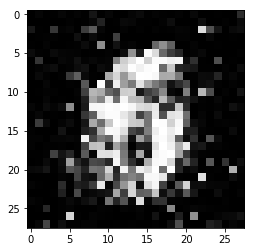

Number batches 78
30(0/78) D: 0.3313, G: 1.5811
30(1/78) D: 0.3735, G: 2.7943
30(2/78) D: 0.4204, G: 1.8456
30(3/78) D: 0.3294, G: 2.1232
30(4/78) D: 0.3664, G: 2.0019
30(5/78) D: 0.3519, G: 2.2542
30(6/78) D: 0.3283, G: 2.4705
30(7/78) D: 0.2958, G: 2.1566
30(8/78) D: 0.3376, G: 1.7049
30(9/78) D: 0.4045, G: 2.1059
30(10/78) D: 0.2867, G: 2.3520
30(11/78) D: 0.2720, G: 2.2404
30(12/78) D: 0.3108, G: 2.0125
30(13/78) D: 0.2941, G: 2.9481
30(14/78) D: 0.3280, G: 1.6260
30(15/78) D: 0.3415, G: 2.5876
30(16/78) D: 0.3065, G: 2.3551
30(17/78) D: 0.2975, G: 2.3947
30(18/78) D: 0.2780, G: 2.2411
30(19/78) D: 0.2377, G: 2.7173
30(20/78) D: 0.3521, G: 1.4349
30(21/78) D: 0.4202, G: 3.6175
30(22/78) D: 0.4861, G: 0.9094
30(23/78) D: 0.5016, G: 3.9623
30(24/78) D: 0.4381, G: 1.4898
30(25/78) D: 0.3690, G: 2.6007
30(26/78) D: 0.2855, G: 2.3749
30(27/78) D: 0.2601, G: 2.2171
30(28/78) D: 0.2880, G: 2.0497
30(29/78) D: 0.3590, G: 2.1077
30(30/78) D: 0.3543, G: 1.9173
30(31/78) D: 0.2956, G: 2.3856


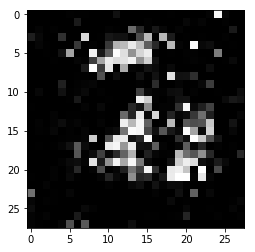

Number batches 78
31(0/78) D: 0.4548, G: 3.3248
31(1/78) D: 0.5075, G: 0.9865
31(2/78) D: 0.4589, G: 3.0272
31(3/78) D: 0.4415, G: 1.4339
31(4/78) D: 0.4004, G: 2.4409
31(5/78) D: 0.3347, G: 1.6388
31(6/78) D: 0.3118, G: 2.1913
31(7/78) D: 0.3056, G: 2.2253
31(8/78) D: 0.3487, G: 1.3170
31(9/78) D: 0.3744, G: 2.1497
31(10/78) D: 0.3395, G: 2.1959
31(11/78) D: 0.3653, G: 1.6428
31(12/78) D: 0.3847, G: 2.4004
31(13/78) D: 0.3556, G: 1.4711
31(14/78) D: 0.4167, G: 2.2129
31(15/78) D: 0.3765, G: 1.5723
31(16/78) D: 0.3771, G: 2.6265
31(17/78) D: 0.3212, G: 1.9200
31(18/78) D: 0.3885, G: 2.0799
31(19/78) D: 0.4239, G: 2.0762
31(20/78) D: 0.4258, G: 1.9411
31(21/78) D: 0.4571, G: 1.5048
31(22/78) D: 0.4556, G: 2.8966
31(23/78) D: 0.5636, G: 0.5353
31(24/78) D: 0.7742, G: 4.8736
31(25/78) D: 0.7991, G: 1.0274
31(26/78) D: 0.5006, G: 2.2337
31(27/78) D: 0.3476, G: 2.7215
31(28/78) D: 0.3848, G: 1.2404
31(29/78) D: 0.4255, G: 2.3871
31(30/78) D: 0.3776, G: 2.1200
31(31/78) D: 0.3598, G: 1.6384


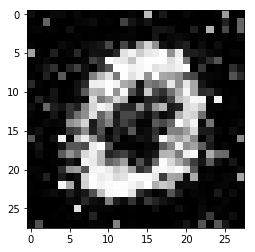

Number batches 78
32(0/78) D: 0.3253, G: 1.5840
32(1/78) D: 0.3290, G: 2.3697
32(2/78) D: 0.3858, G: 1.2686
32(3/78) D: 0.4130, G: 3.1398
32(4/78) D: 0.3962, G: 1.3774
32(5/78) D: 0.4003, G: 2.7638
32(6/78) D: 0.3206, G: 1.6462
32(7/78) D: 0.3439, G: 2.0971
32(8/78) D: 0.3776, G: 1.5844
32(9/78) D: 0.4094, G: 1.6845
32(10/78) D: 0.3801, G: 2.3643
32(11/78) D: 0.3225, G: 1.2927
32(12/78) D: 0.3419, G: 2.4945
32(13/78) D: 0.3574, G: 1.4590
32(14/78) D: 0.3990, G: 3.0918
32(15/78) D: 0.5675, G: 0.5768
32(16/78) D: 0.6626, G: 3.3788
32(17/78) D: 0.4024, G: 1.8812
32(18/78) D: 0.3113, G: 1.6376
32(19/78) D: 0.3191, G: 2.8006
32(20/78) D: 0.3542, G: 1.7092
32(21/78) D: 0.3058, G: 1.8032
32(22/78) D: 0.3251, G: 2.3896
32(23/78) D: 0.3560, G: 1.3387
32(24/78) D: 0.3418, G: 2.5358
32(25/78) D: 0.3372, G: 1.6616
32(26/78) D: 0.3394, G: 2.3678
32(27/78) D: 0.3656, G: 1.3113
32(28/78) D: 0.3763, G: 2.6960
32(29/78) D: 0.4161, G: 1.0411
32(30/78) D: 0.5248, G: 3.5412
32(31/78) D: 0.5228, G: 0.8904


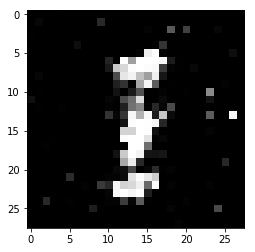

Number batches 78
33(0/78) D: 0.2901, G: 2.2086
33(1/78) D: 0.3107, G: 1.6293
33(2/78) D: 0.3007, G: 2.3927
33(3/78) D: 0.3110, G: 2.0333
33(4/78) D: 0.3126, G: 1.6662
33(5/78) D: 0.3572, G: 1.9921
33(6/78) D: 0.3118, G: 2.1975
33(7/78) D: 0.3270, G: 1.7695
33(8/78) D: 0.3699, G: 1.4989
33(9/78) D: 0.3744, G: 2.6579
33(10/78) D: 0.4021, G: 1.4086
33(11/78) D: 0.3374, G: 2.2386
33(12/78) D: 0.3183, G: 2.0336
33(13/78) D: 0.2867, G: 1.7645
33(14/78) D: 0.3336, G: 2.1617
33(15/78) D: 0.2915, G: 2.0539
33(16/78) D: 0.2917, G: 1.9278
33(17/78) D: 0.2854, G: 2.4255
33(18/78) D: 0.2643, G: 2.1791
33(19/78) D: 0.2618, G: 2.2732
33(20/78) D: 0.2737, G: 1.8869
33(21/78) D: 0.2888, G: 2.0565
33(22/78) D: 0.2788, G: 2.3619
33(23/78) D: 0.3422, G: 1.7277
33(24/78) D: 0.3284, G: 2.2358
33(25/78) D: 0.3246, G: 1.5849
33(26/78) D: 0.3610, G: 3.5201
33(27/78) D: 0.4125, G: 1.0525
33(28/78) D: 0.4547, G: 4.0568
33(29/78) D: 0.5540, G: 1.0027
33(30/78) D: 0.4173, G: 2.4489
33(31/78) D: 0.3062, G: 2.9517


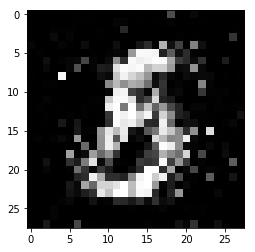

Number batches 78
34(0/78) D: 0.2879, G: 1.8009
34(1/78) D: 0.3337, G: 2.3710
34(2/78) D: 0.3422, G: 1.2093
34(3/78) D: 0.4099, G: 3.0304
34(4/78) D: 0.4461, G: 0.9110
34(5/78) D: 0.4311, G: 2.6444
34(6/78) D: 0.3623, G: 1.7159
34(7/78) D: 0.2977, G: 1.7176
34(8/78) D: 0.3083, G: 2.0379
34(9/78) D: 0.3635, G: 1.7304
34(10/78) D: 0.3227, G: 1.6810
34(11/78) D: 0.3699, G: 2.1505
34(12/78) D: 0.3304, G: 1.6659
34(13/78) D: 0.3329, G: 1.6334
34(14/78) D: 0.3277, G: 2.3726
34(15/78) D: 0.3344, G: 1.3838
34(16/78) D: 0.3319, G: 2.4453
34(17/78) D: 0.2940, G: 1.7147
34(18/78) D: 0.3596, G: 2.6301
34(19/78) D: 0.3231, G: 1.4676
34(20/78) D: 0.3593, G: 2.4668
34(21/78) D: 0.4042, G: 1.4353
34(22/78) D: 0.3441, G: 2.5811
34(23/78) D: 0.4037, G: 1.1865
34(24/78) D: 0.4364, G: 2.5193
34(25/78) D: 0.3852, G: 1.5322
34(26/78) D: 0.3818, G: 1.8668
34(27/78) D: 0.3807, G: 2.4614
34(28/78) D: 0.3258, G: 1.6123
34(29/78) D: 0.3237, G: 1.9889
34(30/78) D: 0.3587, G: 2.1069
34(31/78) D: 0.3424, G: 1.5789


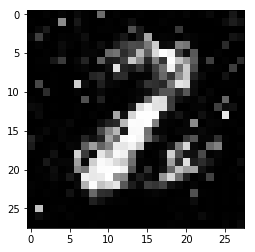

Number batches 78
35(0/78) D: 0.3032, G: 1.9784
35(1/78) D: 0.2973, G: 2.0745
35(2/78) D: 0.2802, G: 2.0090
35(3/78) D: 0.3222, G: 1.5957
35(4/78) D: 0.3433, G: 2.2718
35(5/78) D: 0.3214, G: 1.8873
35(6/78) D: 0.2888, G: 2.0294
35(7/78) D: 0.3061, G: 2.3788
35(8/78) D: 0.3799, G: 1.2512
35(9/78) D: 0.3915, G: 3.3262
35(10/78) D: 0.3092, G: 1.9484
35(11/78) D: 0.3284, G: 2.0226
35(12/78) D: 0.3250, G: 2.3880
35(13/78) D: 0.3725, G: 1.5008
35(14/78) D: 0.3530, G: 3.0579
35(15/78) D: 0.3544, G: 1.6683
35(16/78) D: 0.3421, G: 2.7610
35(17/78) D: 0.3103, G: 1.9322
35(18/78) D: 0.3493, G: 2.1590
35(19/78) D: 0.3158, G: 2.3124
35(20/78) D: 0.3163, G: 1.9132
35(21/78) D: 0.3748, G: 1.7899
35(22/78) D: 0.3491, G: 2.5884
35(23/78) D: 0.3471, G: 1.6676
35(24/78) D: 0.3694, G: 1.9358
35(25/78) D: 0.3207, G: 2.2346
35(26/78) D: 0.3168, G: 1.6858
35(27/78) D: 0.2818, G: 2.7290
35(28/78) D: 0.3169, G: 1.8699
35(29/78) D: 0.3560, G: 2.5338
35(30/78) D: 0.3544, G: 1.3817
35(31/78) D: 0.3937, G: 3.2922


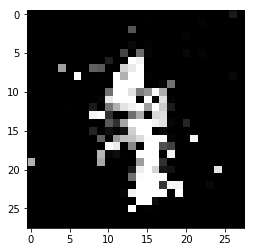

Number batches 78
36(0/78) D: 0.3452, G: 1.9278
36(1/78) D: 0.3418, G: 1.8428
36(2/78) D: 0.3175, G: 1.6560
36(3/78) D: 0.3160, G: 1.7165
36(4/78) D: 0.2998, G: 1.9155
36(5/78) D: 0.3085, G: 1.6552
36(6/78) D: 0.2880, G: 2.1382
36(7/78) D: 0.2931, G: 2.4210
36(8/78) D: 0.3645, G: 1.1929
36(9/78) D: 0.4343, G: 2.5023
36(10/78) D: 0.3237, G: 1.9197
36(11/78) D: 0.2847, G: 1.7937
36(12/78) D: 0.2744, G: 2.1485
36(13/78) D: 0.3407, G: 1.6807
36(14/78) D: 0.2987, G: 2.2195
36(15/78) D: 0.2997, G: 1.8949
36(16/78) D: 0.2883, G: 2.0447
36(17/78) D: 0.2229, G: 2.4562
36(18/78) D: 0.3829, G: 1.3520
36(19/78) D: 0.3490, G: 2.0478
36(20/78) D: 0.3051, G: 2.3433
36(21/78) D: 0.3728, G: 1.0608
36(22/78) D: 0.4427, G: 3.1182
36(23/78) D: 0.3886, G: 1.5124
36(24/78) D: 0.3344, G: 1.9083
36(25/78) D: 0.3222, G: 1.8223
36(26/78) D: 0.3117, G: 1.9162
36(27/78) D: 0.2869, G: 2.0975
36(28/78) D: 0.2500, G: 2.2595
36(29/78) D: 0.2897, G: 1.6478
36(30/78) D: 0.3056, G: 2.1437
36(31/78) D: 0.2747, G: 1.9724


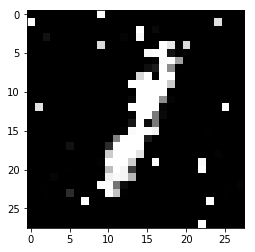

Number batches 78
37(0/78) D: 0.3275, G: 1.5918
37(1/78) D: 0.2879, G: 2.3715
37(2/78) D: 0.3255, G: 1.6377
37(3/78) D: 0.3017, G: 2.6271
37(4/78) D: 0.2982, G: 1.8379
37(5/78) D: 0.3126, G: 1.8245
37(6/78) D: 0.2853, G: 3.3157
37(7/78) D: 0.3631, G: 1.0874
37(8/78) D: 0.4732, G: 3.7175
37(9/78) D: 0.4965, G: 0.9079
37(10/78) D: 0.4375, G: 2.9486
37(11/78) D: 0.3316, G: 2.2215
37(12/78) D: 0.2726, G: 1.4907
37(13/78) D: 0.3247, G: 2.9546
37(14/78) D: 0.2951, G: 2.2492
37(15/78) D: 0.3371, G: 1.6219
37(16/78) D: 0.3221, G: 3.3030
37(17/78) D: 0.3591, G: 1.7207
37(18/78) D: 0.3794, G: 2.2407
37(19/78) D: 0.3135, G: 2.2054
37(20/78) D: 0.2806, G: 2.2756
37(21/78) D: 0.3219, G: 1.5737
37(22/78) D: 0.3629, G: 2.6067
37(23/78) D: 0.3552, G: 1.7233
37(24/78) D: 0.3791, G: 2.2176
37(25/78) D: 0.3205, G: 1.9386
37(26/78) D: 0.3507, G: 2.1964
37(27/78) D: 0.3080, G: 2.1078
37(28/78) D: 0.2716, G: 2.7133
37(29/78) D: 0.3311, G: 1.6723
37(30/78) D: 0.4242, G: 3.7719
37(31/78) D: 0.4872, G: 0.7901


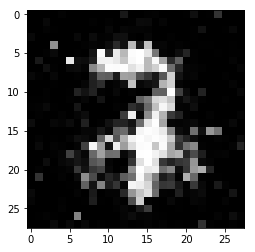

Number batches 78
38(0/78) D: 0.4899, G: 0.5954
38(1/78) D: 0.6302, G: 3.5846
38(2/78) D: 0.5739, G: 1.0894
38(3/78) D: 0.4482, G: 2.2017
38(4/78) D: 0.4363, G: 1.4915
38(5/78) D: 0.3760, G: 2.3056
38(6/78) D: 0.3236, G: 1.9179
38(7/78) D: 0.3309, G: 1.6791
38(8/78) D: 0.4269, G: 1.5600
38(9/78) D: 0.3814, G: 2.4149
38(10/78) D: 0.3248, G: 1.7047
38(11/78) D: 0.3361, G: 1.6519
38(12/78) D: 0.3905, G: 2.9695
38(13/78) D: 0.4943, G: 1.0392
38(14/78) D: 0.4777, G: 2.9984
38(15/78) D: 0.4080, G: 1.4654
38(16/78) D: 0.3374, G: 2.2150
38(17/78) D: 0.2616, G: 2.5538
38(18/78) D: 0.4836, G: 0.9566
38(19/78) D: 0.4729, G: 3.0735
38(20/78) D: 0.4262, G: 1.8567
38(21/78) D: 0.3999, G: 1.6010
38(22/78) D: 0.3819, G: 2.5254
38(23/78) D: 0.4004, G: 1.4643
38(24/78) D: 0.4142, G: 1.7317
38(25/78) D: 0.3509, G: 2.3335
38(26/78) D: 0.3955, G: 1.5034
38(27/78) D: 0.4088, G: 2.4786
38(28/78) D: 0.3277, G: 1.9121
38(29/78) D: 0.2807, G: 1.6985
38(30/78) D: 0.3244, G: 2.1278
38(31/78) D: 0.3259, G: 1.8896


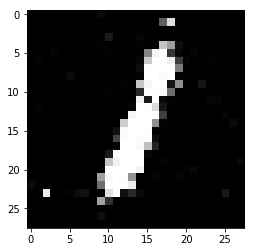

Number batches 78
39(0/78) D: 0.3256, G: 1.5154
39(1/78) D: 0.3245, G: 2.2537
39(2/78) D: 0.3297, G: 1.7205
39(3/78) D: 0.2857, G: 2.0803
39(4/78) D: 0.2963, G: 1.9513
39(5/78) D: 0.2725, G: 1.8467
39(6/78) D: 0.2949, G: 2.5530
39(7/78) D: 0.2990, G: 1.9437
39(8/78) D: 0.3053, G: 1.6233
39(9/78) D: 0.3332, G: 2.7456
39(10/78) D: 0.2990, G: 1.8865
39(11/78) D: 0.2907, G: 1.8162
39(12/78) D: 0.3104, G: 2.4056
39(13/78) D: 0.4061, G: 1.1711
39(14/78) D: 0.3671, G: 3.4239
39(15/78) D: 0.4326, G: 0.9251
39(16/78) D: 0.4344, G: 2.7955
39(17/78) D: 0.3482, G: 2.2503
39(18/78) D: 0.3355, G: 2.3956
39(19/78) D: 0.2566, G: 2.2638
39(20/78) D: 0.3121, G: 1.9429
39(21/78) D: 0.3679, G: 1.7219
39(22/78) D: 0.3793, G: 2.2095
39(23/78) D: 0.2836, G: 1.9910
39(24/78) D: 0.2982, G: 1.9361
39(25/78) D: 0.2964, G: 2.2544
39(26/78) D: 0.3048, G: 1.7394
39(27/78) D: 0.3251, G: 2.1009
39(28/78) D: 0.3478, G: 1.9230
39(29/78) D: 0.3142, G: 2.1157
39(30/78) D: 0.3662, G: 2.0977
39(31/78) D: 0.3103, G: 1.8741


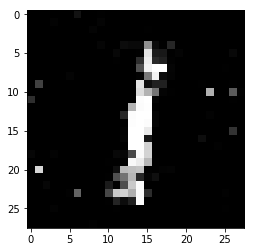

Number batches 78
40(0/78) D: 0.3092, G: 2.1506
40(1/78) D: 0.3173, G: 2.1132
40(2/78) D: 0.3618, G: 1.6289
40(3/78) D: 0.3261, G: 2.4222
40(4/78) D: 0.3224, G: 1.7257
40(5/78) D: 0.3394, G: 2.2037
40(6/78) D: 0.2819, G: 2.2052
40(7/78) D: 0.2875, G: 1.7720
40(8/78) D: 0.3746, G: 1.8295
40(9/78) D: 0.2987, G: 2.3385
40(10/78) D: 0.2957, G: 1.8238
40(11/78) D: 0.3262, G: 2.2834
40(12/78) D: 0.3168, G: 1.4161
40(13/78) D: 0.3756, G: 3.3550
40(14/78) D: 0.4056, G: 0.8768
40(15/78) D: 0.5281, G: 4.3816
40(16/78) D: 0.6401, G: 0.9541
40(17/78) D: 0.5067, G: 2.9466
40(18/78) D: 0.3752, G: 2.4261
40(19/78) D: 0.2969, G: 1.7429
40(20/78) D: 0.3085, G: 2.2535
40(21/78) D: 0.3596, G: 1.5451
40(22/78) D: 0.3431, G: 2.2955
40(23/78) D: 0.3107, G: 1.9870
40(24/78) D: 0.2960, G: 1.8446
40(25/78) D: 0.3166, G: 2.0451
40(26/78) D: 0.3418, G: 1.8178
40(27/78) D: 0.3391, G: 2.0749
40(28/78) D: 0.3755, G: 1.9418
40(29/78) D: 0.3686, G: 1.2357
40(30/78) D: 0.4014, G: 3.9039
40(31/78) D: 0.6372, G: 0.3862


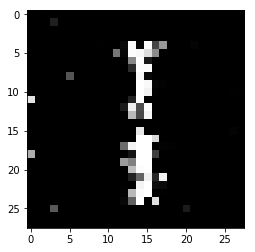

Number batches 78
41(0/78) D: 0.3406, G: 2.2302
41(1/78) D: 0.3614, G: 1.8900
41(2/78) D: 0.3397, G: 2.0029
41(3/78) D: 0.3150, G: 1.9343
41(4/78) D: 0.3540, G: 1.6486
41(5/78) D: 0.3788, G: 2.0958
41(6/78) D: 0.3175, G: 1.9641
41(7/78) D: 0.3111, G: 1.8373
41(8/78) D: 0.3791, G: 1.0238
41(9/78) D: 0.4267, G: 3.5264
41(10/78) D: 0.4163, G: 1.2845
41(11/78) D: 0.3905, G: 2.3462
41(12/78) D: 0.3343, G: 1.8467
41(13/78) D: 0.3149, G: 1.9508
41(14/78) D: 0.2984, G: 2.0540
41(15/78) D: 0.3244, G: 1.4794
41(16/78) D: 0.3358, G: 3.0218
41(17/78) D: 0.3147, G: 1.4755
41(18/78) D: 0.3233, G: 2.6916
41(19/78) D: 0.3020, G: 1.5167
41(20/78) D: 0.3445, G: 2.2771
41(21/78) D: 0.3964, G: 1.2510
41(22/78) D: 0.3812, G: 2.2801
41(23/78) D: 0.4125, G: 1.1154
41(24/78) D: 0.3517, G: 2.4701
41(25/78) D: 0.3265, G: 1.9707
41(26/78) D: 0.3000, G: 1.5016
41(27/78) D: 0.3024, G: 2.3179
41(28/78) D: 0.3099, G: 1.5263
41(29/78) D: 0.3125, G: 2.2170
41(30/78) D: 0.2916, G: 1.9787
41(31/78) D: 0.2684, G: 1.8750


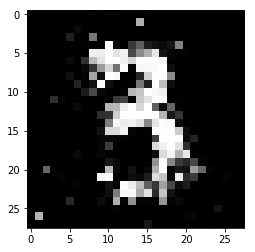

Number batches 78
42(0/78) D: 0.3658, G: 1.5795
42(1/78) D: 0.3188, G: 2.0559
42(2/78) D: 0.3461, G: 1.6141
42(3/78) D: 0.3234, G: 2.3245
42(4/78) D: 0.3196, G: 1.5665
42(5/78) D: 0.3617, G: 2.0114
42(6/78) D: 0.2858, G: 1.7566
42(7/78) D: 0.3055, G: 2.3094
42(8/78) D: 0.4605, G: 0.8632
42(9/78) D: 0.4812, G: 3.6881
42(10/78) D: 0.4418, G: 1.8190
42(11/78) D: 0.3044, G: 1.2172
42(12/78) D: 0.4034, G: 3.1690
42(13/78) D: 0.4663, G: 1.3853
42(14/78) D: 0.3508, G: 2.1068
42(15/78) D: 0.2767, G: 2.2146
42(16/78) D: 0.4052, G: 1.3896
42(17/78) D: 0.3822, G: 2.4849
42(18/78) D: 0.3442, G: 2.0259
42(19/78) D: 0.2998, G: 2.1438
42(20/78) D: 0.4128, G: 1.2925
42(21/78) D: 0.4329, G: 2.1148
42(22/78) D: 0.3782, G: 1.5530
42(23/78) D: 0.4366, G: 2.1709
42(24/78) D: 0.3652, G: 1.3086
42(25/78) D: 0.3833, G: 2.0579
42(26/78) D: 0.4075, G: 1.5327
42(27/78) D: 0.4215, G: 1.9641
42(28/78) D: 0.3227, G: 1.6853
42(29/78) D: 0.3430, G: 1.6824
42(30/78) D: 0.3212, G: 2.0685
42(31/78) D: 0.3331, G: 1.4139


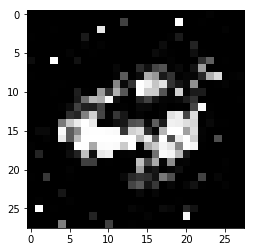

Number batches 78
43(0/78) D: 0.3923, G: 1.4779
43(1/78) D: 0.3626, G: 1.7615
43(2/78) D: 0.3825, G: 1.4075
43(3/78) D: 0.4068, G: 2.4386
43(4/78) D: 0.4406, G: 0.7961
43(5/78) D: 0.5469, G: 3.3965
43(6/78) D: 0.5954, G: 0.8815
43(7/78) D: 0.5653, G: 2.7928
43(8/78) D: 0.5722, G: 1.0994
43(9/78) D: 0.4669, G: 1.9147
43(10/78) D: 0.3427, G: 1.9715
43(11/78) D: 0.3628, G: 1.4693
43(12/78) D: 0.3696, G: 1.9137
43(13/78) D: 0.3802, G: 1.9076
43(14/78) D: 0.3758, G: 1.7776
43(15/78) D: 0.3287, G: 1.8211
43(16/78) D: 0.3525, G: 1.8409
43(17/78) D: 0.2820, G: 2.1872
43(18/78) D: 0.3601, G: 1.2418
43(19/78) D: 0.3744, G: 2.6274
43(20/78) D: 0.4119, G: 0.9421
43(21/78) D: 0.4673, G: 2.6271
43(22/78) D: 0.4494, G: 1.0761
43(23/78) D: 0.3828, G: 2.3710
43(24/78) D: 0.4326, G: 1.2076
43(25/78) D: 0.4138, G: 2.1796
43(26/78) D: 0.4254, G: 1.0317
43(27/78) D: 0.3900, G: 2.3795
43(28/78) D: 0.3649, G: 1.5282
43(29/78) D: 0.3921, G: 2.1895
43(30/78) D: 0.3610, G: 1.6937
43(31/78) D: 0.3198, G: 2.1511


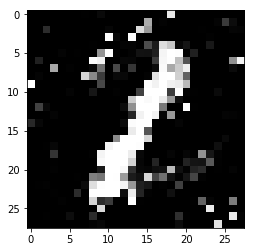

Number batches 78
44(0/78) D: 0.4291, G: 1.4016
44(1/78) D: 0.3675, G: 1.6897
44(2/78) D: 0.3616, G: 1.7177
44(3/78) D: 0.4082, G: 1.6890
44(4/78) D: 0.3435, G: 1.4721
44(5/78) D: 0.3504, G: 2.3321
44(6/78) D: 0.3986, G: 1.1386
44(7/78) D: 0.4048, G: 2.4108
44(8/78) D: 0.5382, G: 0.8169
44(9/78) D: 0.5180, G: 2.5577
44(10/78) D: 0.4498, G: 1.5297
44(11/78) D: 0.3467, G: 1.8840
44(12/78) D: 0.3555, G: 2.0197
44(13/78) D: 0.3809, G: 2.0084
44(14/78) D: 0.3488, G: 1.6763
44(15/78) D: 0.3055, G: 2.1240
44(16/78) D: 0.3093, G: 1.7247
44(17/78) D: 0.2752, G: 2.1394
44(18/78) D: 0.4185, G: 1.0341
44(19/78) D: 0.4018, G: 2.2355
44(20/78) D: 0.3398, G: 2.0185
44(21/78) D: 0.3873, G: 1.2154
44(22/78) D: 0.4073, G: 2.2370
44(23/78) D: 0.3512, G: 1.7474
44(24/78) D: 0.3793, G: 1.1465
44(25/78) D: 0.4076, G: 2.0623
44(26/78) D: 0.4307, G: 1.1963
44(27/78) D: 0.3916, G: 2.2204
44(28/78) D: 0.3127, G: 2.2409
44(29/78) D: 0.3442, G: 1.4254
44(30/78) D: 0.4466, G: 2.0285
44(31/78) D: 0.3985, G: 1.1968


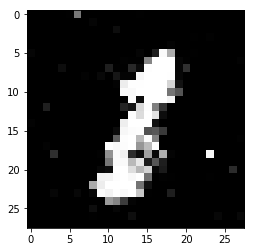

Number batches 78
45(0/78) D: 0.3645, G: 1.3994
45(1/78) D: 0.3656, G: 2.1361
45(2/78) D: 0.3077, G: 1.9565
45(3/78) D: 0.3338, G: 1.4693
45(4/78) D: 0.3752, G: 1.8835
45(5/78) D: 0.2982, G: 2.2057
45(6/78) D: 0.3458, G: 1.3355
45(7/78) D: 0.3589, G: 2.5339
45(8/78) D: 0.4566, G: 0.9636
45(9/78) D: 0.5687, G: 2.6935
45(10/78) D: 0.4344, G: 1.6415
45(11/78) D: 0.3238, G: 1.8561
45(12/78) D: 0.3958, G: 2.5443
45(13/78) D: 0.3804, G: 1.2144
45(14/78) D: 0.4267, G: 2.9520
45(15/78) D: 0.4489, G: 1.1895
45(16/78) D: 0.3870, G: 2.3688
45(17/78) D: 0.3404, G: 1.8021
45(18/78) D: 0.3909, G: 1.5483
45(19/78) D: 0.3552, G: 1.9703
45(20/78) D: 0.2948, G: 1.9686
45(21/78) D: 0.3942, G: 1.4066
45(22/78) D: 0.4260, G: 2.4670
45(23/78) D: 0.4473, G: 1.3395
45(24/78) D: 0.3996, G: 1.8376
45(25/78) D: 0.3990, G: 1.1536
45(26/78) D: 0.4660, G: 2.4718
45(27/78) D: 0.4500, G: 1.4597
45(28/78) D: 0.3868, G: 2.3325
45(29/78) D: 0.3689, G: 1.4101
45(30/78) D: 0.4081, G: 2.0112
45(31/78) D: 0.3675, G: 1.3028


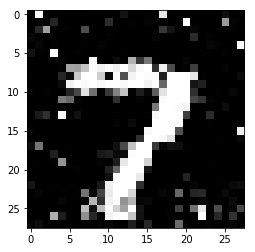

Number batches 78
46(0/78) D: 0.3799, G: 1.4169
46(1/78) D: 0.3914, G: 2.2750
46(2/78) D: 0.3919, G: 0.7831
46(3/78) D: 0.5226, G: 3.5285
46(4/78) D: 0.7116, G: 0.5255
46(5/78) D: 0.7661, G: 3.1584
46(6/78) D: 0.4371, G: 2.3431
46(7/78) D: 0.3480, G: 1.1675
46(8/78) D: 0.4073, G: 1.9968
46(9/78) D: 0.4365, G: 1.4236
46(10/78) D: 0.4106, G: 2.1556
46(11/78) D: 0.3529, G: 1.7685
46(12/78) D: 0.3572, G: 1.5578
46(13/78) D: 0.3513, G: 1.5488
46(14/78) D: 0.3553, G: 1.8422
46(15/78) D: 0.3525, G: 1.7696
46(16/78) D: 0.3772, G: 1.6566
46(17/78) D: 0.3608, G: 2.1897
46(18/78) D: 0.3363, G: 1.5804
46(19/78) D: 0.3028, G: 1.9987
46(20/78) D: 0.3532, G: 1.3363
46(21/78) D: 0.4192, G: 1.9958
46(22/78) D: 0.4580, G: 1.1436
46(23/78) D: 0.4084, G: 2.5717
46(24/78) D: 0.4460, G: 0.9402
46(25/78) D: 0.4571, G: 2.6345
46(26/78) D: 0.4764, G: 1.4169
46(27/78) D: 0.3456, G: 1.6124
46(28/78) D: 0.3545, G: 2.1168
46(29/78) D: 0.4521, G: 1.0327
46(30/78) D: 0.4866, G: 2.4950
46(31/78) D: 0.3837, G: 1.6185


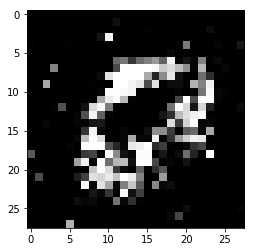

Number batches 78
47(0/78) D: 0.3108, G: 1.8222
47(1/78) D: 0.3630, G: 1.5483
47(2/78) D: 0.4009, G: 1.7122
47(3/78) D: 0.3470, G: 1.5793
47(4/78) D: 0.3775, G: 1.8442
47(5/78) D: 0.3475, G: 1.7694
47(6/78) D: 0.2998, G: 1.5669
47(7/78) D: 0.3374, G: 1.8905
47(8/78) D: 0.4168, G: 1.1588
47(9/78) D: 0.4377, G: 2.3277
47(10/78) D: 0.3634, G: 1.4495
47(11/78) D: 0.4162, G: 2.2131
47(12/78) D: 0.4205, G: 1.1223
47(13/78) D: 0.3847, G: 2.3452
47(14/78) D: 0.3798, G: 1.1502
47(15/78) D: 0.3821, G: 2.5383
47(16/78) D: 0.4002, G: 1.3041
47(17/78) D: 0.4053, G: 2.4369
47(18/78) D: 0.5532, G: 0.9895
47(19/78) D: 0.4916, G: 2.4555
47(20/78) D: 0.4416, G: 1.7347
47(21/78) D: 0.4090, G: 1.1053
47(22/78) D: 0.4895, G: 2.2899
47(23/78) D: 0.4283, G: 1.4456
47(24/78) D: 0.3794, G: 1.6984
47(25/78) D: 0.3772, G: 1.5158
47(26/78) D: 0.4081, G: 1.2680
47(27/78) D: 0.4289, G: 2.3839
47(28/78) D: 0.3884, G: 1.5063
47(29/78) D: 0.3543, G: 1.5479
47(30/78) D: 0.3613, G: 1.6490
47(31/78) D: 0.3664, G: 2.1633


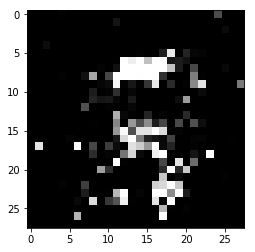

Number batches 78
48(0/78) D: 0.3983, G: 1.9279
48(1/78) D: 0.3838, G: 1.8241
48(2/78) D: 0.3445, G: 1.7785
48(3/78) D: 0.3644, G: 1.8321
48(4/78) D: 0.3924, G: 1.2330
48(5/78) D: 0.4197, G: 2.8032
48(6/78) D: 0.4169, G: 1.3183
48(7/78) D: 0.3637, G: 1.8742
48(8/78) D: 0.4812, G: 1.5075
48(9/78) D: 0.3712, G: 1.9959
48(10/78) D: 0.3577, G: 1.7190
48(11/78) D: 0.3895, G: 1.7169
48(12/78) D: 0.3871, G: 1.6051
48(13/78) D: 0.3653, G: 1.9509
48(14/78) D: 0.3168, G: 1.4837
48(15/78) D: 0.3672, G: 2.6766
48(16/78) D: 0.4119, G: 0.9467
48(17/78) D: 0.4388, G: 2.9789
48(18/78) D: 0.5386, G: 0.7233
48(19/78) D: 0.5364, G: 2.9638
48(20/78) D: 0.4772, G: 1.5724
48(21/78) D: 0.4233, G: 1.6327
48(22/78) D: 0.3710, G: 2.3759
48(23/78) D: 0.3718, G: 1.5503
48(24/78) D: 0.3484, G: 1.7885
48(25/78) D: 0.4041, G: 1.5387
48(26/78) D: 0.3966, G: 2.0692
48(27/78) D: 0.3586, G: 1.2942
48(28/78) D: 0.3522, G: 1.8987
48(29/78) D: 0.3737, G: 1.5491
48(30/78) D: 0.4322, G: 2.0426
48(31/78) D: 0.3610, G: 1.4497


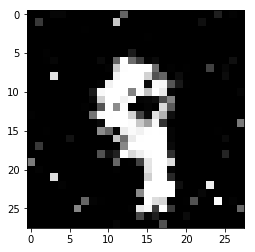

Number batches 78
49(0/78) D: 0.3958, G: 1.5083
49(1/78) D: 0.4021, G: 1.6760
49(2/78) D: 0.3806, G: 1.6132
49(3/78) D: 0.4292, G: 1.2619
49(4/78) D: 0.4314, G: 1.9714
49(5/78) D: 0.3945, G: 1.3703
49(6/78) D: 0.3698, G: 1.8693
49(7/78) D: 0.3438, G: 1.9057
49(8/78) D: 0.4741, G: 0.6766
49(9/78) D: 0.5201, G: 2.8859
49(10/78) D: 0.4831, G: 1.4392
49(11/78) D: 0.4011, G: 1.6504
49(12/78) D: 0.3932, G: 1.7549
49(13/78) D: 0.4300, G: 1.6092
49(14/78) D: 0.4119, G: 1.6662
49(15/78) D: 0.3936, G: 1.5702
49(16/78) D: 0.3869, G: 2.0607
49(17/78) D: 0.3460, G: 1.4852
49(18/78) D: 0.3483, G: 2.2302
49(19/78) D: 0.3734, G: 1.9180
49(20/78) D: 0.3338, G: 1.3596
49(21/78) D: 0.4510, G: 2.2369
49(22/78) D: 0.4686, G: 0.9923
49(23/78) D: 0.4694, G: 2.7753
49(24/78) D: 0.5970, G: 0.8272
49(25/78) D: 0.4727, G: 2.2799
49(26/78) D: 0.4268, G: 1.5557
49(27/78) D: 0.4115, G: 1.3561
49(28/78) D: 0.3906, G: 1.9752
49(29/78) D: 0.4225, G: 1.2613
49(30/78) D: 0.4354, G: 1.7592
49(31/78) D: 0.3674, G: 1.7686


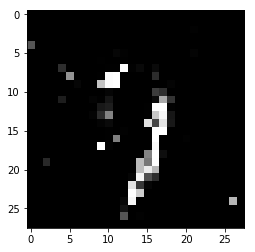

Number batches 78
50(0/78) D: 0.3405, G: 1.7028
50(1/78) D: 0.3382, G: 1.8162
50(2/78) D: 0.3781, G: 1.6042
50(3/78) D: 0.4045, G: 1.5714
50(4/78) D: 0.3888, G: 1.8651
50(5/78) D: 0.3905, G: 1.3405
50(6/78) D: 0.3821, G: 1.7877
50(7/78) D: 0.3520, G: 2.0344
50(8/78) D: 0.4657, G: 0.9446
50(9/78) D: 0.4533, G: 2.2799
50(10/78) D: 0.3675, G: 1.3551
50(11/78) D: 0.3575, G: 1.7332
50(12/78) D: 0.3826, G: 1.5644
50(13/78) D: 0.3771, G: 1.6195
50(14/78) D: 0.3462, G: 1.7090
50(15/78) D: 0.3397, G: 1.6621
50(16/78) D: 0.3837, G: 1.7852
50(17/78) D: 0.3256, G: 1.9895
50(18/78) D: 0.3547, G: 1.6342
50(19/78) D: 0.2757, G: 1.9920
50(20/78) D: 0.3416, G: 1.4909
50(21/78) D: 0.3871, G: 2.0466
50(22/78) D: 0.4082, G: 1.2632
50(23/78) D: 0.3824, G: 2.6694
50(24/78) D: 0.4598, G: 1.0025
50(25/78) D: 0.4545, G: 2.2054
50(26/78) D: 0.4574, G: 1.6509
50(27/78) D: 0.3899, G: 1.4948
50(28/78) D: 0.3717, G: 2.0075
50(29/78) D: 0.3819, G: 1.4190
50(30/78) D: 0.4266, G: 1.8119
50(31/78) D: 0.3957, G: 1.2486


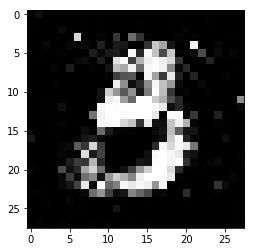

Number batches 78
51(0/78) D: 0.4168, G: 1.9508
51(1/78) D: 0.3684, G: 1.6019
51(2/78) D: 0.3752, G: 1.9010
51(3/78) D: 0.3823, G: 1.4041
51(4/78) D: 0.3584, G: 2.3465
51(5/78) D: 0.5047, G: 0.5874
51(6/78) D: 0.6121, G: 4.4038
51(7/78) D: 0.7721, G: 0.7597
51(8/78) D: 0.5787, G: 2.0489
51(9/78) D: 0.4411, G: 2.1265
51(10/78) D: 0.2769, G: 1.8748
51(11/78) D: 0.3289, G: 1.6316
51(12/78) D: 0.3336, G: 1.9245
51(13/78) D: 0.4029, G: 1.4555
51(14/78) D: 0.3411, G: 2.3138
51(15/78) D: 0.3630, G: 1.3123
51(16/78) D: 0.4283, G: 2.1841
51(17/78) D: 0.3476, G: 1.9001
51(18/78) D: 0.3341, G: 1.5472
51(19/78) D: 0.3426, G: 2.4515
51(20/78) D: 0.4024, G: 1.3408
51(21/78) D: 0.3994, G: 2.1913
51(22/78) D: 0.3960, G: 1.4594
51(23/78) D: 0.3512, G: 2.0362
51(24/78) D: 0.4397, G: 1.1065
51(25/78) D: 0.3966, G: 2.7011
51(26/78) D: 0.4347, G: 1.1223
51(27/78) D: 0.4831, G: 2.6110
51(28/78) D: 0.4957, G: 0.8173
51(29/78) D: 0.5666, G: 2.7523
51(30/78) D: 0.5345, G: 1.0926
51(31/78) D: 0.4299, G: 2.1264


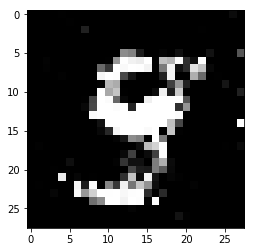

Number batches 78
52(0/78) D: 0.4203, G: 1.8673
52(1/78) D: 0.3718, G: 1.4882
52(2/78) D: 0.3901, G: 1.9320
52(3/78) D: 0.3696, G: 1.4786
52(4/78) D: 0.3883, G: 2.1891
52(5/78) D: 0.4052, G: 0.8956
52(6/78) D: 0.4943, G: 3.3717
52(7/78) D: 0.5782, G: 0.9718
52(8/78) D: 0.5164, G: 1.9622
52(9/78) D: 0.4392, G: 1.1853
52(10/78) D: 0.3886, G: 2.3168
52(11/78) D: 0.3996, G: 1.3980
52(12/78) D: 0.3505, G: 2.0703
52(13/78) D: 0.4198, G: 1.4639
52(14/78) D: 0.4424, G: 1.8462
52(15/78) D: 0.4076, G: 1.4108
52(16/78) D: 0.3986, G: 1.9783
52(17/78) D: 0.3476, G: 1.6866
52(18/78) D: 0.4238, G: 1.6559
52(19/78) D: 0.3964, G: 1.6734
52(20/78) D: 0.3696, G: 1.5831
52(21/78) D: 0.3942, G: 1.5268
52(22/78) D: 0.3927, G: 2.2053
52(23/78) D: 0.3831, G: 1.7396
52(24/78) D: 0.4055, G: 1.5714
52(25/78) D: 0.3773, G: 1.7485
52(26/78) D: 0.4233, G: 1.5896
52(27/78) D: 0.3791, G: 1.4720
52(28/78) D: 0.3740, G: 2.1163
52(29/78) D: 0.4397, G: 0.9677
52(30/78) D: 0.4816, G: 2.6912
52(31/78) D: 0.4830, G: 0.9866


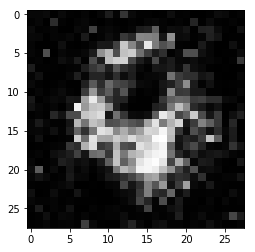

Number batches 78
53(0/78) D: 0.4068, G: 1.2631
53(1/78) D: 0.4185, G: 2.0319
53(2/78) D: 0.4245, G: 1.1861
53(3/78) D: 0.4341, G: 2.1848
53(4/78) D: 0.4077, G: 1.5666
53(5/78) D: 0.3910, G: 1.5733
53(6/78) D: 0.3395, G: 1.9883
53(7/78) D: 0.3247, G: 1.5088
53(8/78) D: 0.4262, G: 1.5556
53(9/78) D: 0.4225, G: 1.8143
53(10/78) D: 0.3059, G: 1.5628
53(11/78) D: 0.3670, G: 1.9487
53(12/78) D: 0.3370, G: 1.3086
53(13/78) D: 0.4168, G: 1.6767
53(14/78) D: 0.3961, G: 2.2121
53(15/78) D: 0.3527, G: 1.2021
53(16/78) D: 0.4634, G: 2.1072
53(17/78) D: 0.4199, G: 1.1812
53(18/78) D: 0.4251, G: 2.7521
53(19/78) D: 0.3780, G: 1.7609
53(20/78) D: 0.3307, G: 0.9702
53(21/78) D: 0.4808, G: 2.2638
53(22/78) D: 0.5153, G: 0.9064
53(23/78) D: 0.4314, G: 2.3434
53(24/78) D: 0.4425, G: 1.3667
53(25/78) D: 0.3933, G: 1.7353
53(26/78) D: 0.4007, G: 2.0877
53(27/78) D: 0.4200, G: 1.1856
53(28/78) D: 0.4042, G: 2.4410
53(29/78) D: 0.4455, G: 1.1778
53(30/78) D: 0.4226, G: 2.0425
53(31/78) D: 0.3521, G: 1.6140


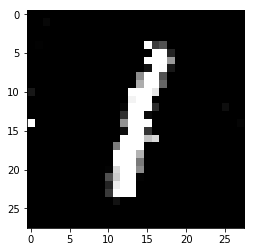

Number batches 78
54(0/78) D: 0.3972, G: 2.1587
54(1/78) D: 0.3827, G: 1.3462
54(2/78) D: 0.4348, G: 2.3345
54(3/78) D: 0.3889, G: 1.5682
54(4/78) D: 0.3727, G: 2.1048
54(5/78) D: 0.3782, G: 1.2687
54(6/78) D: 0.3992, G: 2.6273
54(7/78) D: 0.4516, G: 1.0202
54(8/78) D: 0.4759, G: 1.9290
54(9/78) D: 0.5339, G: 1.0491
54(10/78) D: 0.4623, G: 3.0665
54(11/78) D: 0.5186, G: 1.2395
54(12/78) D: 0.3918, G: 1.7961
54(13/78) D: 0.4048, G: 1.5587
54(14/78) D: 0.3653, G: 1.7469
54(15/78) D: 0.3632, G: 1.8499
54(16/78) D: 0.3734, G: 1.8325
54(17/78) D: 0.3526, G: 1.6938
54(18/78) D: 0.3593, G: 1.9549
54(19/78) D: 0.3420, G: 1.8862
54(20/78) D: 0.3826, G: 1.6775
54(21/78) D: 0.4282, G: 1.6353
54(22/78) D: 0.4041, G: 1.6959
54(23/78) D: 0.3593, G: 2.0722
54(24/78) D: 0.3818, G: 1.2066
54(25/78) D: 0.4264, G: 2.4843
54(26/78) D: 0.4639, G: 1.0865
54(27/78) D: 0.4825, G: 2.3247
54(28/78) D: 0.4014, G: 1.4470
54(29/78) D: 0.4342, G: 1.7693
54(30/78) D: 0.3941, G: 1.6046
54(31/78) D: 0.3651, G: 1.5878


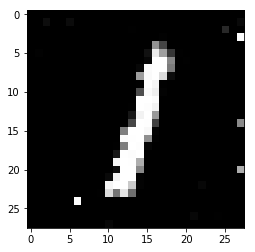

Number batches 78
55(0/78) D: 0.3577, G: 1.8672
55(1/78) D: 0.3457, G: 1.8196
55(2/78) D: 0.3782, G: 1.3604
55(3/78) D: 0.3698, G: 2.1560
55(4/78) D: 0.3483, G: 1.4724
55(5/78) D: 0.3622, G: 1.8723
55(6/78) D: 0.3264, G: 1.6708
55(7/78) D: 0.3239, G: 1.9632
55(8/78) D: 0.4471, G: 0.9374
55(9/78) D: 0.4917, G: 2.7391
55(10/78) D: 0.4858, G: 0.9286
55(11/78) D: 0.4975, G: 2.5931
55(12/78) D: 0.4173, G: 1.5601
55(13/78) D: 0.4074, G: 1.3364
55(14/78) D: 0.3986, G: 2.5683
55(15/78) D: 0.4214, G: 1.2623
55(16/78) D: 0.4331, G: 2.2426
55(17/78) D: 0.3840, G: 1.7904
55(18/78) D: 0.4180, G: 1.3549
55(19/78) D: 0.3840, G: 2.1724
55(20/78) D: 0.4130, G: 1.5485
55(21/78) D: 0.4443, G: 1.2529
55(22/78) D: 0.4248, G: 2.2347
55(23/78) D: 0.4238, G: 1.3006
55(24/78) D: 0.4139, G: 1.6677
55(25/78) D: 0.3913, G: 1.6539
55(26/78) D: 0.4429, G: 1.5164
55(27/78) D: 0.3628, G: 2.1919
55(28/78) D: 0.4300, G: 1.1606
55(29/78) D: 0.4029, G: 1.9870
55(30/78) D: 0.4039, G: 1.5054
55(31/78) D: 0.4133, G: 1.7111


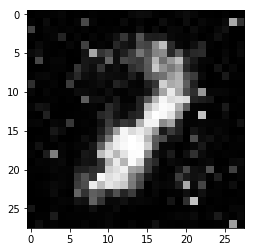

Number batches 78
56(0/78) D: 0.3780, G: 1.4045
56(1/78) D: 0.3633, G: 2.3528
56(2/78) D: 0.3742, G: 1.2893
56(3/78) D: 0.3908, G: 2.4966
56(4/78) D: 0.4055, G: 0.8908
56(5/78) D: 0.4649, G: 2.9599
56(6/78) D: 0.4313, G: 1.4562
56(7/78) D: 0.3781, G: 1.7691
56(8/78) D: 0.4614, G: 1.4635
56(9/78) D: 0.4312, G: 1.3253
56(10/78) D: 0.3702, G: 2.2650
56(11/78) D: 0.3961, G: 1.4629
56(12/78) D: 0.3453, G: 1.8854
56(13/78) D: 0.3665, G: 2.0622
56(14/78) D: 0.3453, G: 1.5406
56(15/78) D: 0.3045, G: 2.2841
56(16/78) D: 0.3237, G: 1.6225
56(17/78) D: 0.3227, G: 2.3046
56(18/78) D: 0.4171, G: 0.9359
56(19/78) D: 0.4907, G: 2.6762
56(20/78) D: 0.3647, G: 2.1149
56(21/78) D: 0.4370, G: 1.0305
56(22/78) D: 0.5117, G: 2.6311
56(23/78) D: 0.4163, G: 1.5964
56(24/78) D: 0.3777, G: 1.4993
56(25/78) D: 0.3706, G: 1.8040
56(26/78) D: 0.4599, G: 1.5145
56(27/78) D: 0.3941, G: 1.9339
56(28/78) D: 0.3626, G: 1.8502
56(29/78) D: 0.3786, G: 1.3188
56(30/78) D: 0.4226, G: 1.9576
56(31/78) D: 0.3900, G: 1.5419


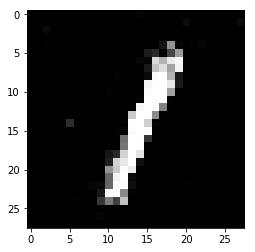

Number batches 78
57(0/78) D: 0.4148, G: 2.4584
57(1/78) D: 0.4341, G: 1.1281
57(2/78) D: 0.4131, G: 2.1572
57(3/78) D: 0.4294, G: 1.4102
57(4/78) D: 0.3908, G: 1.3229
57(5/78) D: 0.4018, G: 2.3172
57(6/78) D: 0.4071, G: 1.1592
57(7/78) D: 0.3981, G: 2.2305
57(8/78) D: 0.5084, G: 1.0176
57(9/78) D: 0.5050, G: 2.0386
57(10/78) D: 0.4069, G: 1.4728
57(11/78) D: 0.3623, G: 2.0536
57(12/78) D: 0.3578, G: 1.4770
57(13/78) D: 0.3973, G: 1.8740
57(14/78) D: 0.3579, G: 1.9583
57(15/78) D: 0.3317, G: 1.6267
57(16/78) D: 0.3885, G: 2.1616
57(17/78) D: 0.3197, G: 1.9213
57(18/78) D: 0.3852, G: 1.3231
57(19/78) D: 0.3406, G: 2.3513
57(20/78) D: 0.3884, G: 1.6513
57(21/78) D: 0.3835, G: 1.1915
57(22/78) D: 0.4516, G: 2.3959
57(23/78) D: 0.4218, G: 1.2137
57(24/78) D: 0.4451, G: 1.9376
57(25/78) D: 0.4717, G: 1.0177
57(26/78) D: 0.5225, G: 2.2131
57(27/78) D: 0.4017, G: 1.5450
57(28/78) D: 0.3735, G: 1.5219
57(29/78) D: 0.3462, G: 1.8675
57(30/78) D: 0.4219, G: 1.5560
57(31/78) D: 0.3679, G: 1.5284


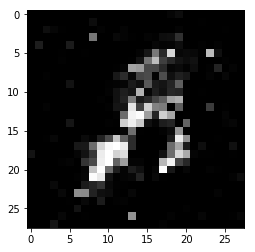

Number batches 78
58(0/78) D: 0.3865, G: 2.0952
58(1/78) D: 0.3833, G: 1.4129
58(2/78) D: 0.3519, G: 2.3404
58(3/78) D: 0.4759, G: 0.9610
58(4/78) D: 0.5056, G: 2.2263
58(5/78) D: 0.4180, G: 1.4718
58(6/78) D: 0.3867, G: 1.7916
58(7/78) D: 0.3869, G: 2.0047
58(8/78) D: 0.5663, G: 0.9306
58(9/78) D: 0.5444, G: 1.9433
58(10/78) D: 0.4396, G: 1.3327
58(11/78) D: 0.3563, G: 1.8001
58(12/78) D: 0.4166, G: 2.5672
58(13/78) D: 0.4522, G: 1.2069
58(14/78) D: 0.4331, G: 2.1772
58(15/78) D: 0.3836, G: 1.6971
58(16/78) D: 0.4221, G: 1.7751
58(17/78) D: 0.3555, G: 1.7825
58(18/78) D: 0.3913, G: 1.6252
58(19/78) D: 0.3020, G: 1.9633
58(20/78) D: 0.3687, G: 1.6895
58(21/78) D: 0.4383, G: 1.1559
58(22/78) D: 0.4654, G: 2.5198
58(23/78) D: 0.4535, G: 0.8835
58(24/78) D: 0.5068, G: 2.3938
58(25/78) D: 0.6144, G: 0.6562
58(26/78) D: 0.6192, G: 2.0461
58(27/78) D: 0.4596, G: 2.2532
58(28/78) D: 0.4693, G: 1.1505
58(29/78) D: 0.4547, G: 2.0792
58(30/78) D: 0.4366, G: 1.8493
58(31/78) D: 0.3741, G: 1.4515


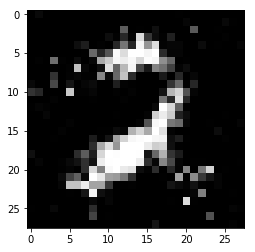

Number batches 78
59(0/78) D: 0.4174, G: 2.0058
59(1/78) D: 0.3974, G: 1.2057
59(2/78) D: 0.4082, G: 1.5735
59(3/78) D: 0.4133, G: 1.8059
59(4/78) D: 0.4241, G: 1.2429
59(5/78) D: 0.4079, G: 2.4079
59(6/78) D: 0.4223, G: 1.1688
59(7/78) D: 0.4423, G: 2.5420
59(8/78) D: 0.6195, G: 0.6054
59(9/78) D: 0.6219, G: 1.9911
59(10/78) D: 0.5185, G: 1.3374
59(11/78) D: 0.4233, G: 1.6615
59(12/78) D: 0.3862, G: 1.4537
59(13/78) D: 0.4482, G: 1.8609
59(14/78) D: 0.3828, G: 1.8735
59(15/78) D: 0.3974, G: 1.1114
59(16/78) D: 0.5084, G: 2.3452
59(17/78) D: 0.4280, G: 1.0879
59(18/78) D: 0.4781, G: 1.7557
59(19/78) D: 0.3859, G: 1.5706
59(20/78) D: 0.3938, G: 1.3544
59(21/78) D: 0.4410, G: 1.6688
59(22/78) D: 0.4935, G: 1.8441
59(23/78) D: 0.3648, G: 1.5681
59(24/78) D: 0.3964, G: 1.2566
59(25/78) D: 0.4606, G: 1.4595
59(26/78) D: 0.4316, G: 1.7834
59(27/78) D: 0.4167, G: 1.6378
59(28/78) D: 0.4459, G: 1.4444
59(29/78) D: 0.4113, G: 1.5117
59(30/78) D: 0.4504, G: 1.4792
59(31/78) D: 0.3908, G: 1.8570


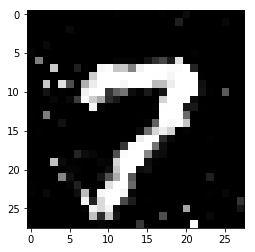

Number batches 78
60(0/78) D: 0.4245, G: 2.1386
60(1/78) D: 0.4573, G: 1.3789
60(2/78) D: 0.4536, G: 1.6278
60(3/78) D: 0.4250, G: 1.7278
60(4/78) D: 0.4124, G: 1.1833
60(5/78) D: 0.4697, G: 2.3501
60(6/78) D: 0.4707, G: 1.2466
60(7/78) D: 0.4546, G: 2.2457
60(8/78) D: 0.5225, G: 0.6488
60(9/78) D: 0.5749, G: 1.8548
60(10/78) D: 0.4086, G: 1.8596
60(11/78) D: 0.4155, G: 1.3312
60(12/78) D: 0.4778, G: 1.9408
60(13/78) D: 0.4181, G: 1.5633
60(14/78) D: 0.3834, G: 1.5491
60(15/78) D: 0.3577, G: 2.1947
60(16/78) D: 0.4316, G: 1.4474
60(17/78) D: 0.3486, G: 1.9172
60(18/78) D: 0.4891, G: 1.2276
60(19/78) D: 0.4715, G: 2.2068
60(20/78) D: 0.4062, G: 1.3329
60(21/78) D: 0.4346, G: 1.4080
60(22/78) D: 0.4174, G: 1.7409
60(23/78) D: 0.3882, G: 1.5123
60(24/78) D: 0.4260, G: 1.3007
60(25/78) D: 0.4604, G: 1.4198
60(26/78) D: 0.4316, G: 1.7192
60(27/78) D: 0.4256, G: 1.3837
60(28/78) D: 0.3800, G: 1.6458
60(29/78) D: 0.3873, G: 1.2603
60(30/78) D: 0.4208, G: 1.8255
60(31/78) D: 0.3929, G: 1.4273


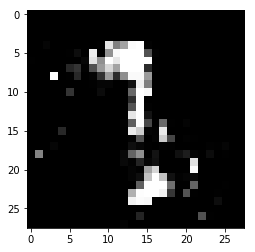

Number batches 78
61(0/78) D: 0.4275, G: 1.6984
61(1/78) D: 0.4086, G: 1.3714
61(2/78) D: 0.4352, G: 1.6002
61(3/78) D: 0.4026, G: 1.3879
61(4/78) D: 0.4211, G: 1.6635
61(5/78) D: 0.3983, G: 1.3078
61(6/78) D: 0.3692, G: 2.0527
61(7/78) D: 0.3591, G: 1.2897
61(8/78) D: 0.5030, G: 1.4851
61(9/78) D: 0.4100, G: 1.3736
61(10/78) D: 0.3687, G: 2.0584
61(11/78) D: 0.4276, G: 1.5256
61(12/78) D: 0.4469, G: 1.8756
61(13/78) D: 0.3701, G: 1.4470
61(14/78) D: 0.3689, G: 2.1018
61(15/78) D: 0.3811, G: 1.2908
61(16/78) D: 0.3609, G: 1.8750
61(17/78) D: 0.3556, G: 1.5893
61(18/78) D: 0.3719, G: 1.6743
61(19/78) D: 0.3919, G: 1.8384
61(20/78) D: 0.3695, G: 1.3680
61(21/78) D: 0.4667, G: 1.9765
61(22/78) D: 0.4210, G: 1.8208
61(23/78) D: 0.3698, G: 1.4832
61(24/78) D: 0.4321, G: 1.8403
61(25/78) D: 0.4200, G: 1.0027
61(26/78) D: 0.4049, G: 2.3647
61(27/78) D: 0.4202, G: 1.0097
61(28/78) D: 0.4908, G: 2.4282
61(29/78) D: 0.5194, G: 0.8192
61(30/78) D: 0.5824, G: 2.8179
61(31/78) D: 0.4734, G: 1.5726


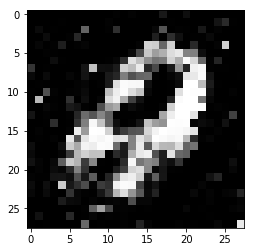

Number batches 78
62(0/78) D: 0.4809, G: 1.2417
62(1/78) D: 0.4688, G: 1.9233
62(2/78) D: 0.4544, G: 1.0325
62(3/78) D: 0.4941, G: 2.3918
62(4/78) D: 0.4879, G: 0.7719
62(5/78) D: 0.5059, G: 2.3893
62(6/78) D: 0.4364, G: 1.5820
62(7/78) D: 0.4159, G: 1.5271
62(8/78) D: 0.4909, G: 1.2276
62(9/78) D: 0.5158, G: 1.3420
62(10/78) D: 0.4140, G: 1.9177
62(11/78) D: 0.4115, G: 1.4522
62(12/78) D: 0.4637, G: 1.6136
62(13/78) D: 0.4718, G: 1.9281
62(14/78) D: 0.4504, G: 1.1247
62(15/78) D: 0.4227, G: 2.0066
62(16/78) D: 0.4421, G: 1.9595
62(17/78) D: 0.4155, G: 1.8436
62(18/78) D: 0.5295, G: 1.3424
62(19/78) D: 0.4818, G: 2.2627
62(20/78) D: 0.4552, G: 0.8956
62(21/78) D: 0.5288, G: 1.7233
62(22/78) D: 0.5019, G: 1.5501
62(23/78) D: 0.4433, G: 1.5645
62(24/78) D: 0.4929, G: 1.3377
62(25/78) D: 0.5198, G: 1.3730
62(26/78) D: 0.4802, G: 1.3950
62(27/78) D: 0.4376, G: 1.4168
62(28/78) D: 0.4555, G: 1.5650
62(29/78) D: 0.4220, G: 1.2266
62(30/78) D: 0.4529, G: 1.9300
62(31/78) D: 0.4405, G: 1.1014


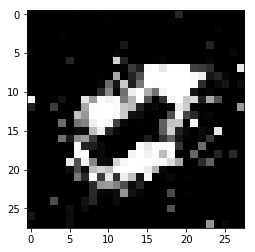

Number batches 78
63(0/78) D: 0.3990, G: 1.4615
63(1/78) D: 0.4267, G: 1.4282
63(2/78) D: 0.4413, G: 1.4655
63(3/78) D: 0.4587, G: 1.9889
63(4/78) D: 0.4869, G: 0.8495
63(5/78) D: 0.5043, G: 2.4344
63(6/78) D: 0.4688, G: 1.1110
63(7/78) D: 0.4395, G: 1.7180
63(8/78) D: 0.5340, G: 1.1325
63(9/78) D: 0.4914, G: 1.2882
63(10/78) D: 0.4108, G: 2.1601
63(11/78) D: 0.4609, G: 1.2529
63(12/78) D: 0.5130, G: 1.5820
63(13/78) D: 0.4679, G: 1.4642
63(14/78) D: 0.4097, G: 1.4899
63(15/78) D: 0.4339, G: 1.4048
63(16/78) D: 0.3875, G: 1.6120
63(17/78) D: 0.3966, G: 1.4841
63(18/78) D: 0.5222, G: 1.5669
63(19/78) D: 0.4599, G: 1.3360
63(20/78) D: 0.4677, G: 1.6070
63(21/78) D: 0.5414, G: 1.2389
63(22/78) D: 0.4682, G: 2.1059
63(23/78) D: 0.4563, G: 1.1119
63(24/78) D: 0.5030, G: 1.2860
63(25/78) D: 0.5183, G: 1.8725
63(26/78) D: 0.5096, G: 1.1643
63(27/78) D: 0.4235, G: 1.3978
63(28/78) D: 0.3958, G: 1.6011
63(29/78) D: 0.4640, G: 1.2436
63(30/78) D: 0.4682, G: 1.7879
63(31/78) D: 0.4484, G: 1.5091


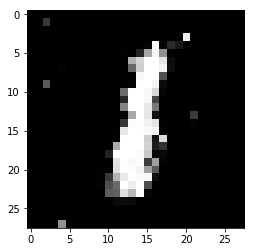

Number batches 78
64(0/78) D: 0.4663, G: 1.7020
64(1/78) D: 0.4770, G: 1.5513
64(2/78) D: 0.4652, G: 1.1400
64(3/78) D: 0.4626, G: 1.7908
64(4/78) D: 0.4388, G: 1.1590
64(5/78) D: 0.4319, G: 1.9039
64(6/78) D: 0.4334, G: 1.3856
64(7/78) D: 0.3822, G: 1.8064
64(8/78) D: 0.5323, G: 1.0307
64(9/78) D: 0.5022, G: 1.8286
64(10/78) D: 0.4104, G: 1.5397
64(11/78) D: 0.3833, G: 1.5202
64(12/78) D: 0.4282, G: 1.8324
64(13/78) D: 0.4994, G: 1.1858
64(14/78) D: 0.4098, G: 1.9065
64(15/78) D: 0.4654, G: 1.6172
64(16/78) D: 0.4385, G: 1.5841
64(17/78) D: 0.4044, G: 1.3067
64(18/78) D: 0.4571, G: 1.2907
64(19/78) D: 0.4477, G: 1.6758
64(20/78) D: 0.3814, G: 1.7538
64(21/78) D: 0.4295, G: 1.5434
64(22/78) D: 0.4074, G: 1.5891
64(23/78) D: 0.4094, G: 1.4954
64(24/78) D: 0.4832, G: 1.3238
64(25/78) D: 0.4360, G: 2.0660
64(26/78) D: 0.4451, G: 1.1697
64(27/78) D: 0.4262, G: 1.9974
64(28/78) D: 0.4369, G: 1.1652
64(29/78) D: 0.3971, G: 1.8051
64(30/78) D: 0.3943, G: 1.2943
64(31/78) D: 0.4010, G: 1.9930


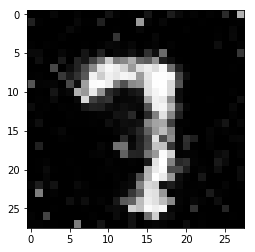

Number batches 78
65(0/78) D: 0.4469, G: 1.5302
65(1/78) D: 0.4365, G: 1.2600
65(2/78) D: 0.4394, G: 1.8391
65(3/78) D: 0.4418, G: 1.4154
65(4/78) D: 0.4978, G: 1.5416
65(5/78) D: 0.4273, G: 1.7924
65(6/78) D: 0.4480, G: 1.2336
65(7/78) D: 0.4523, G: 2.2520
65(8/78) D: 0.5989, G: 0.6167
65(9/78) D: 0.6267, G: 1.9656
65(10/78) D: 0.4532, G: 1.6430
65(11/78) D: 0.4102, G: 1.4455
65(12/78) D: 0.4461, G: 1.6386
65(13/78) D: 0.4811, G: 1.3984
65(14/78) D: 0.4444, G: 1.7980
65(15/78) D: 0.4925, G: 1.1847
65(16/78) D: 0.4373, G: 1.5263
65(17/78) D: 0.4546, G: 1.5672
65(18/78) D: 0.4287, G: 1.3165
65(19/78) D: 0.4077, G: 1.5268
65(20/78) D: 0.4302, G: 1.7145
65(21/78) D: 0.5041, G: 0.9634
65(22/78) D: 0.4657, G: 2.0953
65(23/78) D: 0.4447, G: 1.2098
65(24/78) D: 0.5021, G: 1.5647
65(25/78) D: 0.5164, G: 1.1168
65(26/78) D: 0.4413, G: 1.9652
65(27/78) D: 0.4638, G: 1.1405
65(28/78) D: 0.4748, G: 1.7519
65(29/78) D: 0.4948, G: 1.1642
65(30/78) D: 0.4873, G: 1.7104
65(31/78) D: 0.3926, G: 1.4385


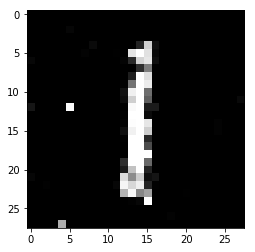

Number batches 78
66(0/78) D: 0.4625, G: 1.2863
66(1/78) D: 0.4895, G: 1.6450
66(2/78) D: 0.5009, G: 0.9583
66(3/78) D: 0.5391, G: 2.4619
66(4/78) D: 0.5400, G: 0.9083
66(5/78) D: 0.5278, G: 2.0623
66(6/78) D: 0.4298, G: 1.5596
66(7/78) D: 0.3715, G: 1.4327
66(8/78) D: 0.5000, G: 1.5333
66(9/78) D: 0.5313, G: 1.1307
66(10/78) D: 0.4122, G: 1.8529
66(11/78) D: 0.4357, G: 1.7044
66(12/78) D: 0.4392, G: 1.2118
66(13/78) D: 0.5122, G: 1.5917
66(14/78) D: 0.4401, G: 1.8089
66(15/78) D: 0.4220, G: 1.6082
66(16/78) D: 0.4719, G: 1.1313
66(17/78) D: 0.4141, G: 2.5469
66(18/78) D: 0.6134, G: 0.7429
66(19/78) D: 0.6451, G: 2.1717
66(20/78) D: 0.5135, G: 1.1697
66(21/78) D: 0.5359, G: 1.4781
66(22/78) D: 0.5148, G: 1.2058
66(23/78) D: 0.4707, G: 2.1540
66(24/78) D: 0.5313, G: 0.8893
66(25/78) D: 0.5228, G: 1.7635
66(26/78) D: 0.4433, G: 1.7604
66(27/78) D: 0.4270, G: 1.0636
66(28/78) D: 0.4729, G: 1.6964
66(29/78) D: 0.4490, G: 1.4847
66(30/78) D: 0.4410, G: 1.5434
66(31/78) D: 0.4835, G: 1.7969


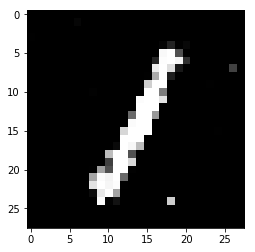

Number batches 78
67(0/78) D: 0.4644, G: 1.5642
67(1/78) D: 0.4497, G: 1.4613
67(2/78) D: 0.4319, G: 1.3221
67(3/78) D: 0.4577, G: 1.9415
67(4/78) D: 0.5025, G: 0.8459
67(5/78) D: 0.4665, G: 1.6666
67(6/78) D: 0.4554, G: 1.2441
67(7/78) D: 0.4081, G: 1.9047
67(8/78) D: 0.4905, G: 1.0381
67(9/78) D: 0.4566, G: 1.3384
67(10/78) D: 0.4298, G: 2.0759
67(11/78) D: 0.4365, G: 1.2809
67(12/78) D: 0.4302, G: 1.4904
67(13/78) D: 0.4328, G: 1.6585
67(14/78) D: 0.4147, G: 1.6957
67(15/78) D: 0.3834, G: 1.2985
67(16/78) D: 0.3863, G: 1.7795
67(17/78) D: 0.3299, G: 1.7615
67(18/78) D: 0.4519, G: 1.1085
67(19/78) D: 0.4652, G: 1.9994
67(20/78) D: 0.4039, G: 1.7814
67(21/78) D: 0.4204, G: 1.3671
67(22/78) D: 0.4238, G: 1.4009
67(23/78) D: 0.3811, G: 1.9223
67(24/78) D: 0.4666, G: 1.0124
67(25/78) D: 0.4828, G: 1.6726
67(26/78) D: 0.4105, G: 1.6959
67(27/78) D: 0.4027, G: 1.3632
67(28/78) D: 0.4581, G: 1.7767
67(29/78) D: 0.4161, G: 1.3260
67(30/78) D: 0.4168, G: 1.6089
67(31/78) D: 0.3530, G: 1.6528


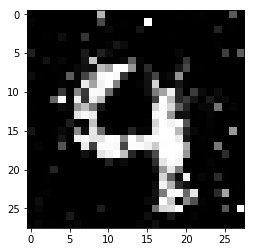

Number batches 78
68(0/78) D: 0.4040, G: 1.2868
68(1/78) D: 0.4759, G: 1.7256
68(2/78) D: 0.4990, G: 1.0375
68(3/78) D: 0.4613, G: 1.8905
68(4/78) D: 0.4320, G: 1.1927
68(5/78) D: 0.4594, G: 1.5788
68(6/78) D: 0.4207, G: 1.3688
68(7/78) D: 0.3789, G: 1.7896
68(8/78) D: 0.5268, G: 0.7350
68(9/78) D: 0.6064, G: 1.6188
68(10/78) D: 0.4396, G: 1.3788
68(11/78) D: 0.4032, G: 1.6350
68(12/78) D: 0.4556, G: 1.7019
68(13/78) D: 0.4668, G: 1.0942
68(14/78) D: 0.5019, G: 1.7516
68(15/78) D: 0.4014, G: 1.4008
68(16/78) D: 0.4169, G: 1.4410
68(17/78) D: 0.3907, G: 1.7911
68(18/78) D: 0.5223, G: 1.2093
68(19/78) D: 0.4559, G: 1.7408
68(20/78) D: 0.4209, G: 1.1765
68(21/78) D: 0.4720, G: 1.5825
68(22/78) D: 0.4551, G: 1.7233
68(23/78) D: 0.4394, G: 1.4861
68(24/78) D: 0.4929, G: 1.2833
68(25/78) D: 0.4998, G: 1.2903
68(26/78) D: 0.4408, G: 1.8329
68(27/78) D: 0.4183, G: 1.1252
68(28/78) D: 0.4629, G: 1.5844
68(29/78) D: 0.4596, G: 1.2570
68(30/78) D: 0.4513, G: 1.4087
68(31/78) D: 0.4332, G: 1.8088


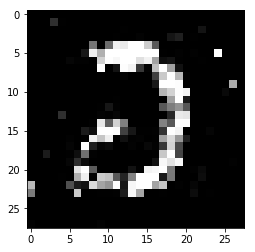

Number batches 78
69(0/78) D: 0.4416, G: 1.8555
69(1/78) D: 0.4846, G: 0.9761
69(2/78) D: 0.4315, G: 1.9165
69(3/78) D: 0.4069, G: 1.5598
69(4/78) D: 0.4408, G: 0.9988
69(5/78) D: 0.4828, G: 1.8744
69(6/78) D: 0.4239, G: 1.5162
69(7/78) D: 0.4062, G: 1.2814
69(8/78) D: 0.4877, G: 1.5005
69(9/78) D: 0.4209, G: 1.4340
69(10/78) D: 0.4551, G: 1.4466
69(11/78) D: 0.4385, G: 1.6032
69(12/78) D: 0.4462, G: 1.6147
69(13/78) D: 0.4303, G: 1.5021
69(14/78) D: 0.4230, G: 1.4781
69(15/78) D: 0.3530, G: 1.5597
69(16/78) D: 0.4218, G: 1.7696
69(17/78) D: 0.4196, G: 1.4550
69(18/78) D: 0.4501, G: 1.4537
69(19/78) D: 0.4097, G: 1.9697
69(20/78) D: 0.4154, G: 1.1040
69(21/78) D: 0.4656, G: 1.5694
69(22/78) D: 0.4589, G: 1.5245
69(23/78) D: 0.4327, G: 1.4675
69(24/78) D: 0.4815, G: 1.6946
69(25/78) D: 0.4574, G: 1.0952
69(26/78) D: 0.4526, G: 2.0494
69(27/78) D: 0.4493, G: 1.0795
69(28/78) D: 0.4246, G: 1.9718
69(29/78) D: 0.4246, G: 1.4372
69(30/78) D: 0.4172, G: 1.5917
69(31/78) D: 0.4199, G: 1.8637


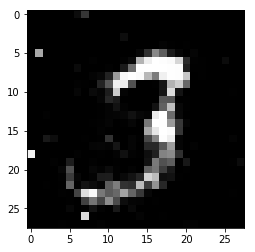

Number batches 78
70(0/78) D: 0.4225, G: 1.8818
70(1/78) D: 0.4362, G: 1.2622
70(2/78) D: 0.3917, G: 1.8132
70(3/78) D: 0.3923, G: 1.3656
70(4/78) D: 0.4516, G: 1.6842
70(5/78) D: 0.4287, G: 1.2625
70(6/78) D: 0.4391, G: 2.1458
70(7/78) D: 0.3884, G: 1.4341
70(8/78) D: 0.5327, G: 1.0136
70(9/78) D: 0.4877, G: 2.1173
70(10/78) D: 0.4785, G: 1.1828
70(11/78) D: 0.4421, G: 1.7185
70(12/78) D: 0.4406, G: 1.5809
70(13/78) D: 0.4624, G: 1.7049
70(14/78) D: 0.4514, G: 1.6236
70(15/78) D: 0.4212, G: 1.8216
70(16/78) D: 0.4420, G: 1.2232
70(17/78) D: 0.4180, G: 2.1574
70(18/78) D: 0.5469, G: 1.0900
70(19/78) D: 0.4769, G: 2.1794
70(20/78) D: 0.5166, G: 1.0731
70(21/78) D: 0.4961, G: 1.3879
70(22/78) D: 0.4563, G: 1.7874
70(23/78) D: 0.3834, G: 1.2449
70(24/78) D: 0.4898, G: 1.6369
70(25/78) D: 0.5398, G: 0.9927
70(26/78) D: 0.4491, G: 2.0111
70(27/78) D: 0.4846, G: 1.2182
70(28/78) D: 0.4530, G: 1.6660
70(29/78) D: 0.4695, G: 1.6930
70(30/78) D: 0.4358, G: 1.5604
70(31/78) D: 0.4493, G: 1.3515


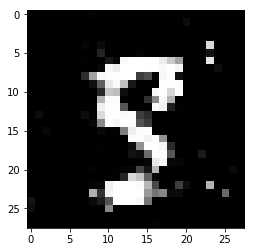

Number batches 78
71(0/78) D: 0.4031, G: 1.6724
71(1/78) D: 0.4125, G: 1.8027
71(2/78) D: 0.4140, G: 1.4939
71(3/78) D: 0.3993, G: 1.8294
71(4/78) D: 0.4661, G: 0.8832
71(5/78) D: 0.4700, G: 2.2268
71(6/78) D: 0.4036, G: 1.5096
71(7/78) D: 0.3466, G: 1.6524
71(8/78) D: 0.4946, G: 1.1150
71(9/78) D: 0.4541, G: 1.9475
71(10/78) D: 0.3819, G: 1.6159
71(11/78) D: 0.4838, G: 1.4527
71(12/78) D: 0.4206, G: 1.6528
71(13/78) D: 0.4662, G: 1.6806
71(14/78) D: 0.4168, G: 1.6373
71(15/78) D: 0.4048, G: 1.1847
71(16/78) D: 0.4197, G: 2.4209
71(17/78) D: 0.4408, G: 1.4510
71(18/78) D: 0.5474, G: 1.4207
71(19/78) D: 0.4521, G: 1.8182
71(20/78) D: 0.4344, G: 1.0185
71(21/78) D: 0.4854, G: 1.4973
71(22/78) D: 0.4497, G: 1.8849
71(23/78) D: 0.3856, G: 1.4537
71(24/78) D: 0.4245, G: 1.4278
71(25/78) D: 0.4956, G: 1.9076
71(26/78) D: 0.4672, G: 1.5351
71(27/78) D: 0.4408, G: 1.3311
71(28/78) D: 0.4052, G: 1.7570
71(29/78) D: 0.4878, G: 1.3119
71(30/78) D: 0.5406, G: 1.9570
71(31/78) D: 0.4179, G: 1.2739


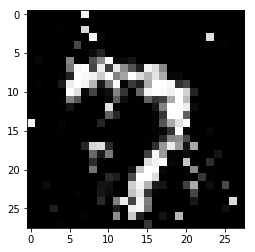

Number batches 78
72(0/78) D: 0.4385, G: 1.3336
72(1/78) D: 0.4352, G: 1.5787
72(2/78) D: 0.4904, G: 1.4701
72(3/78) D: 0.4793, G: 1.6588
72(4/78) D: 0.4663, G: 0.9646
72(5/78) D: 0.4729, G: 2.2281
72(6/78) D: 0.4775, G: 1.3218
72(7/78) D: 0.3619, G: 1.7596
72(8/78) D: 0.5256, G: 1.1210
72(9/78) D: 0.4369, G: 1.5696
72(10/78) D: 0.4287, G: 1.8321
72(11/78) D: 0.4774, G: 1.5623
72(12/78) D: 0.4509, G: 1.7049
72(13/78) D: 0.4446, G: 1.0554
72(14/78) D: 0.4362, G: 2.3518
72(15/78) D: 0.5133, G: 0.7674
72(16/78) D: 0.6914, G: 2.5734
72(17/78) D: 0.5623, G: 1.4390
72(18/78) D: 0.5687, G: 1.1345
72(19/78) D: 0.4771, G: 1.6014
72(20/78) D: 0.4325, G: 1.6705
72(21/78) D: 0.4532, G: 1.1665
72(22/78) D: 0.4741, G: 1.8743
72(23/78) D: 0.4446, G: 1.5838
72(24/78) D: 0.5118, G: 1.0817
72(25/78) D: 0.4672, G: 1.4533
72(26/78) D: 0.4604, G: 1.5249
72(27/78) D: 0.4547, G: 1.1900
72(28/78) D: 0.4062, G: 1.5528
72(29/78) D: 0.4022, G: 1.4851
72(30/78) D: 0.4448, G: 1.4636
72(31/78) D: 0.4008, G: 1.3242


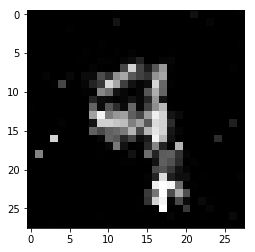

Number batches 78
73(0/78) D: 0.4472, G: 1.6408
73(1/78) D: 0.4520, G: 1.2530
73(2/78) D: 0.4278, G: 1.7318
73(3/78) D: 0.4331, G: 1.5220
73(4/78) D: 0.4944, G: 1.1868
73(5/78) D: 0.4568, G: 1.9849
73(6/78) D: 0.4357, G: 1.0780
73(7/78) D: 0.4418, G: 1.9491
73(8/78) D: 0.5708, G: 0.6396
73(9/78) D: 0.5705, G: 2.3360
73(10/78) D: 0.5216, G: 1.2301
73(11/78) D: 0.4032, G: 1.4910
73(12/78) D: 0.3954, G: 1.9277
73(13/78) D: 0.4974, G: 1.4156
73(14/78) D: 0.4043, G: 1.9966
73(15/78) D: 0.4008, G: 1.4342
73(16/78) D: 0.3965, G: 1.5186
73(17/78) D: 0.3716, G: 1.9721
73(18/78) D: 0.4637, G: 1.4845
73(19/78) D: 0.3699, G: 1.4587
73(20/78) D: 0.4215, G: 1.6402
73(21/78) D: 0.4185, G: 1.5464
73(22/78) D: 0.4189, G: 1.7702
73(23/78) D: 0.4054, G: 1.8472
73(24/78) D: 0.3979, G: 1.2700
73(25/78) D: 0.4507, G: 1.9895
73(26/78) D: 0.3953, G: 1.5737
73(27/78) D: 0.4224, G: 1.6152
73(28/78) D: 0.4296, G: 1.4093
73(29/78) D: 0.4268, G: 1.7588
73(30/78) D: 0.4345, G: 1.3670
73(31/78) D: 0.4239, G: 1.8716


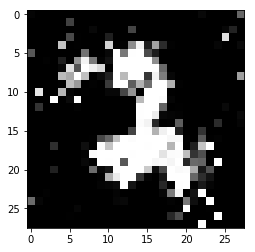

Number batches 78
74(0/78) D: 0.4474, G: 1.5722
74(1/78) D: 0.4110, G: 1.6750
74(2/78) D: 0.4511, G: 1.2638
74(3/78) D: 0.4752, G: 2.1657
74(4/78) D: 0.4810, G: 1.1154
74(5/78) D: 0.4886, G: 1.7295
74(6/78) D: 0.4204, G: 1.6717
74(7/78) D: 0.3948, G: 1.6115
74(8/78) D: 0.4848, G: 1.4223
74(9/78) D: 0.4008, G: 1.5399
74(10/78) D: 0.3484, G: 1.8416
74(11/78) D: 0.3833, G: 1.3033
74(12/78) D: 0.3911, G: 1.7400
74(13/78) D: 0.4198, G: 1.8600
74(14/78) D: 0.4364, G: 1.7478
74(15/78) D: 0.3844, G: 1.2549
74(16/78) D: 0.4158, G: 2.0747
74(17/78) D: 0.4207, G: 1.3364
74(18/78) D: 0.4727, G: 1.1952
74(19/78) D: 0.4571, G: 2.7279
74(20/78) D: 0.5093, G: 1.2197
74(21/78) D: 0.4735, G: 1.3451
74(22/78) D: 0.4191, G: 2.1912
74(23/78) D: 0.4226, G: 1.2900
74(24/78) D: 0.4567, G: 1.5302
74(25/78) D: 0.4385, G: 1.2892
74(26/78) D: 0.4132, G: 1.8913
74(27/78) D: 0.4122, G: 1.6180
74(28/78) D: 0.4537, G: 1.0885
74(29/78) D: 0.4737, G: 1.9103
74(30/78) D: 0.4409, G: 1.7267
74(31/78) D: 0.3721, G: 1.5143


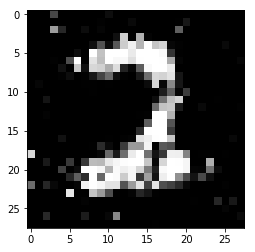

Number batches 78
75(0/78) D: 0.3884, G: 1.6015
75(1/78) D: 0.4084, G: 1.5789
75(2/78) D: 0.4236, G: 1.4360
75(3/78) D: 0.4175, G: 1.7865
75(4/78) D: 0.4120, G: 1.5764
75(5/78) D: 0.4312, G: 1.6401
75(6/78) D: 0.3615, G: 1.5561
75(7/78) D: 0.3362, G: 1.8029
75(8/78) D: 0.4965, G: 0.9726
75(9/78) D: 0.5417, G: 1.8694
75(10/78) D: 0.4157, G: 1.6822
75(11/78) D: 0.4021, G: 1.6136
75(12/78) D: 0.4388, G: 1.7057
75(13/78) D: 0.4137, G: 1.3374
75(14/78) D: 0.3970, G: 1.6075
75(15/78) D: 0.4047, G: 1.5235
75(16/78) D: 0.4081, G: 1.5668
75(17/78) D: 0.4039, G: 1.3583
75(18/78) D: 0.4807, G: 1.6077
75(19/78) D: 0.4656, G: 1.6207
75(20/78) D: 0.4450, G: 1.6037
75(21/78) D: 0.5575, G: 1.0199
75(22/78) D: 0.5504, G: 2.4235
75(23/78) D: 0.4482, G: 1.3388
75(24/78) D: 0.4484, G: 1.4659
75(25/78) D: 0.4345, G: 1.4903
75(26/78) D: 0.3640, G: 1.7215
75(27/78) D: 0.4033, G: 1.6167
75(28/78) D: 0.4503, G: 1.3521
75(29/78) D: 0.4272, G: 1.5497
75(30/78) D: 0.4158, G: 1.6016
75(31/78) D: 0.4593, G: 1.2761


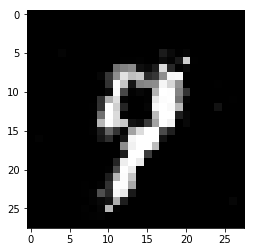

Number batches 78
76(0/78) D: 0.3913, G: 1.4555
76(1/78) D: 0.3921, G: 1.5266
76(2/78) D: 0.4194, G: 1.4577
76(3/78) D: 0.4149, G: 1.9732
76(4/78) D: 0.4419, G: 1.4407
76(5/78) D: 0.3913, G: 1.7718
76(6/78) D: 0.3706, G: 1.9113
76(7/78) D: 0.4058, G: 1.9261
76(8/78) D: 0.5558, G: 0.5335
76(9/78) D: 0.7274, G: 2.5116
76(10/78) D: 0.5014, G: 1.2729
76(11/78) D: 0.4285, G: 1.6771
76(12/78) D: 0.4361, G: 1.8298
76(13/78) D: 0.3952, G: 1.6755
76(14/78) D: 0.3759, G: 1.5759
76(15/78) D: 0.4020, G: 1.6835
76(16/78) D: 0.3991, G: 1.6512
76(17/78) D: 0.3734, G: 1.7597
76(18/78) D: 0.4311, G: 1.1298
76(19/78) D: 0.4242, G: 1.9441
76(20/78) D: 0.4428, G: 1.1878
76(21/78) D: 0.4420, G: 1.5715
76(22/78) D: 0.4333, G: 1.6043
76(23/78) D: 0.3904, G: 1.4790
76(24/78) D: 0.4328, G: 1.3088
76(25/78) D: 0.4481, G: 1.9174
76(26/78) D: 0.4337, G: 1.2713
76(27/78) D: 0.4361, G: 1.6326
76(28/78) D: 0.4617, G: 1.2135
76(29/78) D: 0.4894, G: 1.7065
76(30/78) D: 0.4096, G: 1.5170
76(31/78) D: 0.3986, G: 1.5567


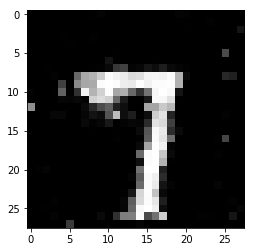

Number batches 78
77(0/78) D: 0.4378, G: 1.2617
77(1/78) D: 0.4651, G: 2.0711
77(2/78) D: 0.5061, G: 0.8442
77(3/78) D: 0.5694, G: 2.2447
77(4/78) D: 0.5091, G: 1.3894
77(5/78) D: 0.4616, G: 1.4944
77(6/78) D: 0.4173, G: 1.7980
77(7/78) D: 0.3879, G: 1.3998
77(8/78) D: 0.5233, G: 0.9941
77(9/78) D: 0.4991, G: 1.3698
77(10/78) D: 0.3801, G: 1.6929
77(11/78) D: 0.4110, G: 1.6499
77(12/78) D: 0.4549, G: 1.4074
77(13/78) D: 0.4783, G: 1.5246
77(14/78) D: 0.4452, G: 1.3961
77(15/78) D: 0.4303, G: 1.2818
77(16/78) D: 0.4475, G: 1.9731
77(17/78) D: 0.3852, G: 1.4131
77(18/78) D: 0.4947, G: 1.1624
77(19/78) D: 0.4571, G: 1.8857
77(20/78) D: 0.4292, G: 1.1711
77(21/78) D: 0.5004, G: 1.6627
77(22/78) D: 0.5250, G: 1.5383
77(23/78) D: 0.3988, G: 1.6716
77(24/78) D: 0.4477, G: 1.1646
77(25/78) D: 0.4800, G: 1.3393
77(26/78) D: 0.4424, G: 1.8410
77(27/78) D: 0.4372, G: 1.1387
77(28/78) D: 0.4328, G: 1.5506
77(29/78) D: 0.5021, G: 1.5372
77(30/78) D: 0.4775, G: 1.5375
77(31/78) D: 0.4552, G: 1.3575


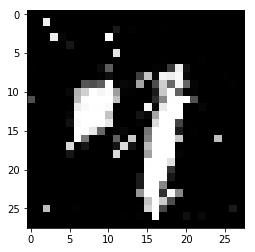

Number batches 78
78(0/78) D: 0.4515, G: 1.9003
78(1/78) D: 0.4878, G: 0.8836
78(2/78) D: 0.5964, G: 2.0118
78(3/78) D: 0.4551, G: 1.5834
78(4/78) D: 0.4746, G: 1.0936
78(5/78) D: 0.5324, G: 2.3249
78(6/78) D: 0.5019, G: 1.1207
78(7/78) D: 0.4731, G: 1.9291
78(8/78) D: 0.5818, G: 0.9989
78(9/78) D: 0.4964, G: 1.5744
78(10/78) D: 0.4372, G: 1.9138
78(11/78) D: 0.4272, G: 1.1090
78(12/78) D: 0.4283, G: 1.5893
78(13/78) D: 0.4323, G: 1.8186
78(14/78) D: 0.4585, G: 1.0980
78(15/78) D: 0.4790, G: 1.7072
78(16/78) D: 0.4221, G: 1.2020
78(17/78) D: 0.4306, G: 1.6439
78(18/78) D: 0.5110, G: 1.3149
78(19/78) D: 0.4717, G: 1.7347
78(20/78) D: 0.4407, G: 1.4015
78(21/78) D: 0.4739, G: 1.2434
78(22/78) D: 0.4846, G: 1.8276
78(23/78) D: 0.4686, G: 1.5036
78(24/78) D: 0.4908, G: 1.2167
78(25/78) D: 0.4132, G: 1.4842
78(26/78) D: 0.4080, G: 1.9100
78(27/78) D: 0.4545, G: 1.1802
78(28/78) D: 0.5033, G: 1.7562
78(29/78) D: 0.4407, G: 1.2287
78(30/78) D: 0.4811, G: 1.8354
78(31/78) D: 0.4108, G: 1.5740


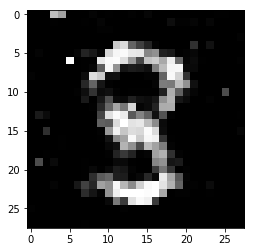

Number batches 78
79(0/78) D: 0.4418, G: 1.6923
79(1/78) D: 0.4572, G: 1.1265
79(2/78) D: 0.4303, G: 1.3360
79(3/78) D: 0.3915, G: 1.5389
79(4/78) D: 0.4144, G: 1.4197
79(5/78) D: 0.4080, G: 1.6982
79(6/78) D: 0.3881, G: 1.9331
79(7/78) D: 0.3807, G: 1.5023
79(8/78) D: 0.4804, G: 1.3174
79(9/78) D: 0.4967, G: 1.5268
79(10/78) D: 0.4369, G: 1.6963
79(11/78) D: 0.4010, G: 1.2922
79(12/78) D: 0.4924, G: 2.0003
79(13/78) D: 0.5093, G: 1.2297
79(14/78) D: 0.4287, G: 1.5195
79(15/78) D: 0.3892, G: 1.8572
79(16/78) D: 0.3872, G: 1.3389
79(17/78) D: 0.3952, G: 1.7622
79(18/78) D: 0.5316, G: 1.2132
79(19/78) D: 0.4453, G: 1.8215
79(20/78) D: 0.4805, G: 1.5876
79(21/78) D: 0.4929, G: 1.3471
79(22/78) D: 0.3794, G: 1.8549
79(23/78) D: 0.3859, G: 1.6459
79(24/78) D: 0.4994, G: 1.2221
79(25/78) D: 0.4504, G: 2.1291
79(26/78) D: 0.4297, G: 1.3024
79(27/78) D: 0.4225, G: 1.7137
79(28/78) D: 0.4095, G: 1.6291
79(29/78) D: 0.3907, G: 1.6657
79(30/78) D: 0.4497, G: 1.6067
79(31/78) D: 0.4327, G: 1.6744


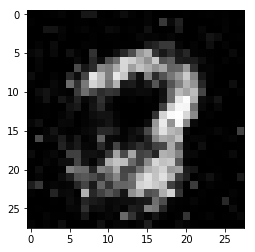

Number batches 78
80(0/78) D: 0.4236, G: 1.9169
80(1/78) D: 0.4829, G: 0.9841
80(2/78) D: 0.5211, G: 1.7904
80(3/78) D: 0.4170, G: 1.6163
80(4/78) D: 0.4315, G: 1.2906
80(5/78) D: 0.4651, G: 1.4833
80(6/78) D: 0.3886, G: 1.8173
80(7/78) D: 0.3583, G: 1.5985
80(8/78) D: 0.5133, G: 1.3159
80(9/78) D: 0.4427, G: 1.8010
80(10/78) D: 0.4101, G: 1.6717
80(11/78) D: 0.4363, G: 1.4969
80(12/78) D: 0.4362, G: 1.4190
80(13/78) D: 0.4574, G: 2.0769
80(14/78) D: 0.4547, G: 0.8264
80(15/78) D: 0.4655, G: 2.0023
80(16/78) D: 0.4450, G: 1.5277
80(17/78) D: 0.3633, G: 1.4844
80(18/78) D: 0.4717, G: 1.2039
80(19/78) D: 0.4590, G: 1.7744
80(20/78) D: 0.3999, G: 1.5758
80(21/78) D: 0.4704, G: 1.3014
80(22/78) D: 0.4312, G: 1.8776
80(23/78) D: 0.4106, G: 1.6289
80(24/78) D: 0.4691, G: 1.1416
80(25/78) D: 0.4448, G: 1.5329
80(26/78) D: 0.4151, G: 1.8676
80(27/78) D: 0.4356, G: 1.0082
80(28/78) D: 0.4114, G: 1.8683
80(29/78) D: 0.4507, G: 1.3328
80(30/78) D: 0.4775, G: 1.5531
80(31/78) D: 0.4646, G: 1.6389


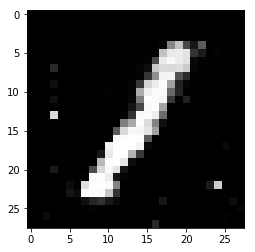

Number batches 78
81(0/78) D: 0.4689, G: 1.1023
81(1/78) D: 0.4544, G: 1.9029
81(2/78) D: 0.4754, G: 1.2651
81(3/78) D: 0.4508, G: 1.8272
81(4/78) D: 0.4961, G: 1.3614
81(5/78) D: 0.4358, G: 2.1071
81(6/78) D: 0.4450, G: 1.5251
81(7/78) D: 0.4014, G: 1.4185
81(8/78) D: 0.4892, G: 1.4256
81(9/78) D: 0.4916, G: 1.2360
81(10/78) D: 0.3927, G: 2.1450
81(11/78) D: 0.4712, G: 1.0057
81(12/78) D: 0.5255, G: 2.3705
81(13/78) D: 0.4803, G: 1.3739
81(14/78) D: 0.4248, G: 1.6762
81(15/78) D: 0.4012, G: 2.2750
81(16/78) D: 0.4817, G: 1.0964
81(17/78) D: 0.4137, G: 1.9877
81(18/78) D: 0.5338, G: 1.2914
81(19/78) D: 0.4539, G: 1.8287
81(20/78) D: 0.4234, G: 1.7122
81(21/78) D: 0.4519, G: 1.0269
81(22/78) D: 0.4956, G: 2.0821
81(23/78) D: 0.4033, G: 1.5525
81(24/78) D: 0.4069, G: 1.3204
81(25/78) D: 0.4859, G: 1.8367
81(26/78) D: 0.4174, G: 1.6309
81(27/78) D: 0.4377, G: 1.6306
81(28/78) D: 0.4326, G: 1.1828
81(29/78) D: 0.4191, G: 1.8905
81(30/78) D: 0.4918, G: 1.2708
81(31/78) D: 0.4493, G: 1.5650


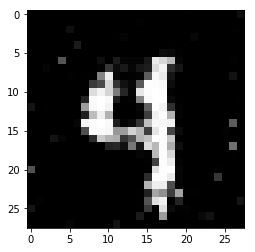

Number batches 78
82(0/78) D: 0.4523, G: 1.6619
82(1/78) D: 0.4285, G: 1.5756
82(2/78) D: 0.4533, G: 1.2119
82(3/78) D: 0.4277, G: 1.8900
82(4/78) D: 0.4789, G: 1.0099
82(5/78) D: 0.4336, G: 1.9319
82(6/78) D: 0.3820, G: 1.7363
82(7/78) D: 0.3649, G: 1.4101
82(8/78) D: 0.5183, G: 1.6182
82(9/78) D: 0.4864, G: 1.7011
82(10/78) D: 0.3966, G: 1.7923
82(11/78) D: 0.4386, G: 1.0982
82(12/78) D: 0.4821, G: 2.2684
82(13/78) D: 0.4754, G: 1.3818
82(14/78) D: 0.4398, G: 1.6609
82(15/78) D: 0.4119, G: 1.5547
82(16/78) D: 0.3911, G: 1.4551
82(17/78) D: 0.3767, G: 1.8487
82(18/78) D: 0.5446, G: 1.3094
82(19/78) D: 0.4429, G: 1.9806
82(20/78) D: 0.4130, G: 1.4247
82(21/78) D: 0.4439, G: 1.1465
82(22/78) D: 0.4411, G: 1.7894
82(23/78) D: 0.3772, G: 1.8519
82(24/78) D: 0.4472, G: 1.0692
82(25/78) D: 0.4743, G: 1.5346
82(26/78) D: 0.4085, G: 1.6297
82(27/78) D: 0.4381, G: 1.3780
82(28/78) D: 0.4450, G: 1.3542
82(29/78) D: 0.3935, G: 1.7683
82(30/78) D: 0.4864, G: 1.6127
82(31/78) D: 0.4260, G: 1.5620


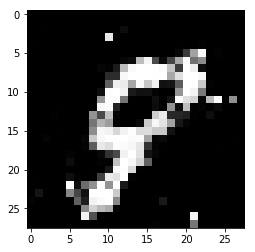

Number batches 78
83(0/78) D: 0.4428, G: 1.1561
83(1/78) D: 0.4517, G: 1.9754
83(2/78) D: 0.4783, G: 1.2010
83(3/78) D: 0.4494, G: 1.8810
83(4/78) D: 0.4517, G: 1.4145
83(5/78) D: 0.4006, G: 1.6310
83(6/78) D: 0.3854, G: 1.7297
83(7/78) D: 0.3547, G: 1.5109
83(8/78) D: 0.5182, G: 1.0579
83(9/78) D: 0.4582, G: 1.9490
83(10/78) D: 0.3910, G: 1.4117
83(11/78) D: 0.4297, G: 1.8028
83(12/78) D: 0.4340, G: 1.5644
83(13/78) D: 0.4738, G: 1.7284
83(14/78) D: 0.3971, G: 1.5100
83(15/78) D: 0.4206, G: 1.7623
83(16/78) D: 0.3760, G: 1.6026
83(17/78) D: 0.3442, G: 2.0072
83(18/78) D: 0.4889, G: 1.1078
83(19/78) D: 0.4478, G: 1.8719
83(20/78) D: 0.4077, G: 1.4567
83(21/78) D: 0.5046, G: 1.3172
83(22/78) D: 0.4947, G: 2.2068
83(23/78) D: 0.4520, G: 1.1455
83(24/78) D: 0.4603, G: 1.6618
83(25/78) D: 0.4761, G: 1.3020
83(26/78) D: 0.4501, G: 1.7360
83(27/78) D: 0.4704, G: 1.5000
83(28/78) D: 0.4889, G: 1.0580
83(29/78) D: 0.4944, G: 2.3223
83(30/78) D: 0.5548, G: 1.1351
83(31/78) D: 0.4239, G: 1.8121


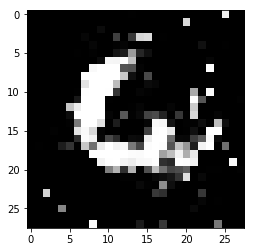

Number batches 78
84(0/78) D: 0.4253, G: 2.1555
84(1/78) D: 0.4915, G: 1.1930
84(2/78) D: 0.4406, G: 1.4522
84(3/78) D: 0.3984, G: 1.7655
84(4/78) D: 0.4341, G: 1.2672
84(5/78) D: 0.4507, G: 1.6818
84(6/78) D: 0.5057, G: 1.8202
84(7/78) D: 0.4361, G: 1.2074
84(8/78) D: 0.5267, G: 1.2158
84(9/78) D: 0.4735, G: 1.6061
84(10/78) D: 0.3932, G: 1.6654
84(11/78) D: 0.4088, G: 1.4227
84(12/78) D: 0.4731, G: 1.4891
84(13/78) D: 0.4215, G: 1.8260
84(14/78) D: 0.4569, G: 1.8447
84(15/78) D: 0.4113, G: 1.2259
84(16/78) D: 0.4325, G: 2.2973
84(17/78) D: 0.4265, G: 1.3895
84(18/78) D: 0.5093, G: 1.4697
84(19/78) D: 0.4545, G: 1.9935
84(20/78) D: 0.4261, G: 1.4648
84(21/78) D: 0.4386, G: 1.4370
84(22/78) D: 0.3956, G: 1.3626
84(23/78) D: 0.3547, G: 1.8922
84(24/78) D: 0.4450, G: 1.1399
84(25/78) D: 0.4916, G: 1.5069
84(26/78) D: 0.4710, G: 2.2826
84(27/78) D: 0.5418, G: 0.8519
84(28/78) D: 0.5547, G: 2.1212
84(29/78) D: 0.4774, G: 1.3680
84(30/78) D: 0.4882, G: 1.4632
84(31/78) D: 0.4088, G: 1.6053


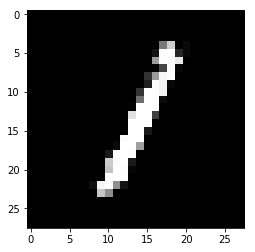

Number batches 78
85(0/78) D: 0.4551, G: 1.3218
85(1/78) D: 0.4553, G: 1.3415
85(2/78) D: 0.4292, G: 1.4077
85(3/78) D: 0.3791, G: 1.6190
85(4/78) D: 0.4365, G: 1.6869
85(5/78) D: 0.4327, G: 1.4569
85(6/78) D: 0.4290, G: 1.9297
85(7/78) D: 0.4579, G: 1.5938
85(8/78) D: 0.5658, G: 0.9694
85(9/78) D: 0.5222, G: 1.3468
85(10/78) D: 0.4380, G: 1.7048
85(11/78) D: 0.4245, G: 1.7886
85(12/78) D: 0.4006, G: 1.2736
85(13/78) D: 0.5133, G: 1.8563
85(14/78) D: 0.4378, G: 1.4396
85(15/78) D: 0.4268, G: 1.2841
85(16/78) D: 0.4623, G: 1.9808
85(17/78) D: 0.4101, G: 1.4888
85(18/78) D: 0.4311, G: 1.3539
85(19/78) D: 0.4401, G: 1.6174
85(20/78) D: 0.3937, G: 1.4211
85(21/78) D: 0.4634, G: 1.4277
85(22/78) D: 0.4813, G: 1.5412
85(23/78) D: 0.4193, G: 1.4490
85(24/78) D: 0.4530, G: 1.3396
85(25/78) D: 0.4730, G: 1.1739
85(26/78) D: 0.4843, G: 2.4698
85(27/78) D: 0.5588, G: 0.8096
85(28/78) D: 0.5018, G: 1.6026
85(29/78) D: 0.4205, G: 1.9118
85(30/78) D: 0.4995, G: 1.2514
85(31/78) D: 0.4739, G: 1.4773


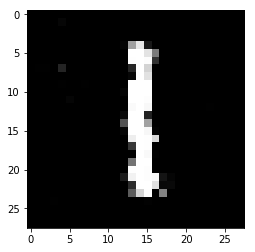

Number batches 78
86(0/78) D: 0.4037, G: 1.4269
86(1/78) D: 0.4263, G: 1.6128
86(2/78) D: 0.4921, G: 1.2041
86(3/78) D: 0.4399, G: 1.9522
86(4/78) D: 0.4263, G: 1.4505
86(5/78) D: 0.4357, G: 1.5403
86(6/78) D: 0.3771, G: 1.8813
86(7/78) D: 0.3924, G: 1.4574
86(8/78) D: 0.4718, G: 1.0889
86(9/78) D: 0.4725, G: 2.0895
86(10/78) D: 0.4266, G: 1.2201
86(11/78) D: 0.4268, G: 1.9004
86(12/78) D: 0.4406, G: 1.4203
86(13/78) D: 0.4516, G: 1.4729
86(14/78) D: 0.4083, G: 2.0036
86(15/78) D: 0.3744, G: 1.5384
86(16/78) D: 0.4094, G: 1.8649
86(17/78) D: 0.4146, G: 1.4531
86(18/78) D: 0.5068, G: 1.7289
86(19/78) D: 0.4228, G: 1.5835
86(20/78) D: 0.3797, G: 1.6654
86(21/78) D: 0.5301, G: 1.3527
86(22/78) D: 0.4113, G: 1.5211
86(23/78) D: 0.4146, G: 1.6310
86(24/78) D: 0.4560, G: 1.1575
86(25/78) D: 0.4056, G: 1.7798
86(26/78) D: 0.4567, G: 2.0341
86(27/78) D: 0.4450, G: 0.9972
86(28/78) D: 0.4694, G: 1.9228
86(29/78) D: 0.3986, G: 1.6132
86(30/78) D: 0.3874, G: 1.3100
86(31/78) D: 0.3825, G: 1.9842


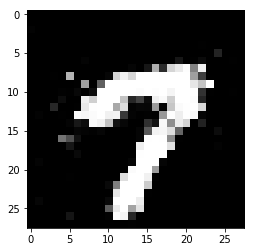

Number batches 78
87(0/78) D: 0.3944, G: 1.6350
87(1/78) D: 0.4466, G: 1.5065
87(2/78) D: 0.4597, G: 0.8746
87(3/78) D: 0.5338, G: 2.5477
87(4/78) D: 0.5627, G: 0.8649
87(5/78) D: 0.5043, G: 2.0518
87(6/78) D: 0.3967, G: 1.8558
87(7/78) D: 0.3904, G: 1.6059
87(8/78) D: 0.5517, G: 1.0639
87(9/78) D: 0.4728, G: 1.6503
87(10/78) D: 0.3975, G: 1.8795
87(11/78) D: 0.4025, G: 1.4603
87(12/78) D: 0.4112, G: 1.4685
87(13/78) D: 0.4052, G: 1.4975
87(14/78) D: 0.4177, G: 1.5516
87(15/78) D: 0.4307, G: 1.4272
87(16/78) D: 0.4060, G: 1.6887
87(17/78) D: 0.4200, G: 1.6167
87(18/78) D: 0.4796, G: 1.0737
87(19/78) D: 0.4674, G: 1.8490
87(20/78) D: 0.3844, G: 1.6143
87(21/78) D: 0.4353, G: 1.2266
87(22/78) D: 0.4416, G: 1.5666
87(23/78) D: 0.4194, G: 1.4297
87(24/78) D: 0.5223, G: 1.5569
87(25/78) D: 0.4705, G: 1.3119
87(26/78) D: 0.4294, G: 1.8665
87(27/78) D: 0.4448, G: 1.1655
87(28/78) D: 0.4576, G: 1.5446
87(29/78) D: 0.4653, G: 1.6694
87(30/78) D: 0.5074, G: 1.3558
87(31/78) D: 0.4375, G: 1.6948


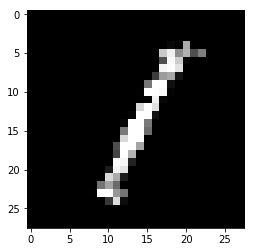

Number batches 78
88(0/78) D: 0.4208, G: 1.6395
88(1/78) D: 0.4549, G: 1.6764
88(2/78) D: 0.4728, G: 0.9488
88(3/78) D: 0.4849, G: 1.8908
88(4/78) D: 0.4377, G: 1.4496
88(5/78) D: 0.4486, G: 1.7859
88(6/78) D: 0.4024, G: 1.5612
88(7/78) D: 0.3793, G: 1.3807
88(8/78) D: 0.4886, G: 1.2457
88(9/78) D: 0.4757, G: 1.2760
88(10/78) D: 0.4661, G: 2.1085
88(11/78) D: 0.4342, G: 1.4079
88(12/78) D: 0.4555, G: 1.5048
88(13/78) D: 0.4888, G: 1.3922
88(14/78) D: 0.3886, G: 1.8248
88(15/78) D: 0.4056, G: 1.4696
88(16/78) D: 0.3357, G: 1.8311
88(17/78) D: 0.3927, G: 1.3404
88(18/78) D: 0.5716, G: 1.3478
88(19/78) D: 0.4439, G: 1.9927
88(20/78) D: 0.4077, G: 1.2338
88(21/78) D: 0.4617, G: 1.5885
88(22/78) D: 0.4581, G: 1.4519
88(23/78) D: 0.4170, G: 1.9815
88(24/78) D: 0.4976, G: 0.9935
88(25/78) D: 0.4861, G: 1.9127
88(26/78) D: 0.4069, G: 1.6744
88(27/78) D: 0.3967, G: 1.4721
88(28/78) D: 0.4142, G: 1.6743
88(29/78) D: 0.4153, G: 1.5915
88(30/78) D: 0.3964, G: 1.4993
88(31/78) D: 0.4661, G: 2.3064


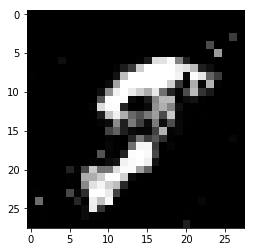

Number batches 78
89(0/78) D: 0.4449, G: 1.9793
89(1/78) D: 0.4938, G: 1.1572
89(2/78) D: 0.4335, G: 1.4216
89(3/78) D: 0.4786, G: 1.8079
89(4/78) D: 0.4077, G: 1.6319
89(5/78) D: 0.4398, G: 1.3186
89(6/78) D: 0.4227, G: 1.7571
89(7/78) D: 0.4553, G: 1.5627
89(8/78) D: 0.5063, G: 0.9358
89(9/78) D: 0.5607, G: 2.0521
89(10/78) D: 0.4945, G: 1.2861
89(11/78) D: 0.4490, G: 1.5579
89(12/78) D: 0.4317, G: 1.9495
89(13/78) D: 0.4713, G: 1.4520
89(14/78) D: 0.4312, G: 1.4407
89(15/78) D: 0.4339, G: 1.3597
89(16/78) D: 0.3863, G: 1.9412
89(17/78) D: 0.3373, G: 1.4497
89(18/78) D: 0.4868, G: 1.2435
89(19/78) D: 0.3881, G: 1.8293
89(20/78) D: 0.4251, G: 1.6227
89(21/78) D: 0.4405, G: 1.1766
89(22/78) D: 0.4675, G: 2.0094
89(23/78) D: 0.3862, G: 1.5698
89(24/78) D: 0.4187, G: 1.2784
89(25/78) D: 0.5088, G: 1.7076
89(26/78) D: 0.4528, G: 1.6850
89(27/78) D: 0.4255, G: 1.5806
89(28/78) D: 0.4045, G: 1.4976
89(29/78) D: 0.3880, G: 1.3718
89(30/78) D: 0.4569, G: 1.3719
89(31/78) D: 0.4360, G: 1.8060


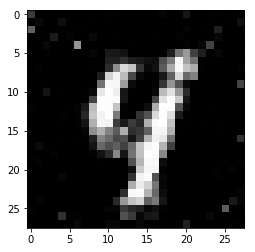

Number batches 78
90(0/78) D: 0.4031, G: 1.6386
90(1/78) D: 0.4113, G: 1.5185
90(2/78) D: 0.4640, G: 1.3666
90(3/78) D: 0.5209, G: 2.2133
90(4/78) D: 0.5225, G: 0.9334
90(5/78) D: 0.6087, G: 2.2928
90(6/78) D: 0.4463, G: 1.4450
90(7/78) D: 0.3691, G: 1.4511
90(8/78) D: 0.4317, G: 1.3398
90(9/78) D: 0.4393, G: 1.5385
90(10/78) D: 0.3974, G: 1.5433
90(11/78) D: 0.4221, G: 1.6485
90(12/78) D: 0.3814, G: 1.1166
90(13/78) D: 0.4517, G: 1.8437
90(14/78) D: 0.4639, G: 1.3946
90(15/78) D: 0.3819, G: 1.3007
90(16/78) D: 0.4123, G: 2.1207
90(17/78) D: 0.4429, G: 1.5415
90(18/78) D: 0.5169, G: 1.0935
90(19/78) D: 0.4402, G: 1.5819
90(20/78) D: 0.3505, G: 1.6760
90(21/78) D: 0.4711, G: 1.0704
90(22/78) D: 0.4943, G: 1.9578
90(23/78) D: 0.3986, G: 1.3089
90(24/78) D: 0.4159, G: 1.4618
90(25/78) D: 0.4679, G: 1.3274
90(26/78) D: 0.4695, G: 2.3042
90(27/78) D: 0.5089, G: 0.8318
90(28/78) D: 0.5408, G: 2.0518
90(29/78) D: 0.4743, G: 1.2222
90(30/78) D: 0.5056, G: 1.3647
90(31/78) D: 0.4489, G: 1.8060


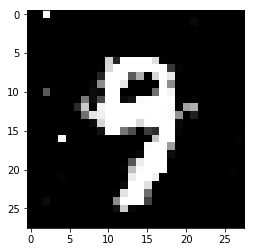

Number batches 78
91(0/78) D: 0.3859, G: 1.7553
91(1/78) D: 0.4062, G: 1.6197
91(2/78) D: 0.4206, G: 1.5002
91(3/78) D: 0.4216, G: 1.7340
91(4/78) D: 0.4572, G: 1.7150
91(5/78) D: 0.3814, G: 1.5412
91(6/78) D: 0.4091, G: 1.9824
91(7/78) D: 0.4098, G: 1.2927
91(8/78) D: 0.4785, G: 1.5373
91(9/78) D: 0.4611, G: 1.3120
91(10/78) D: 0.4316, G: 2.0928
91(11/78) D: 0.3821, G: 1.6967
91(12/78) D: 0.4466, G: 1.5186
91(13/78) D: 0.4584, G: 1.6278
91(14/78) D: 0.3886, G: 1.7422
91(15/78) D: 0.4356, G: 1.3124
91(16/78) D: 0.4651, G: 2.6585
91(17/78) D: 0.4885, G: 1.0775
91(18/78) D: 0.5617, G: 1.5602
91(19/78) D: 0.4723, G: 1.7427
91(20/78) D: 0.4105, G: 1.9148
91(21/78) D: 0.5355, G: 0.7225
91(22/78) D: 0.6187, G: 2.4398
91(23/78) D: 0.4871, G: 1.3855
91(24/78) D: 0.3984, G: 1.5216
91(25/78) D: 0.4943, G: 1.7802
91(26/78) D: 0.3998, G: 1.6713
91(27/78) D: 0.4556, G: 1.6926
91(28/78) D: 0.4312, G: 1.6619
91(29/78) D: 0.4145, G: 1.6509
91(30/78) D: 0.4915, G: 1.6888
91(31/78) D: 0.3747, G: 1.1280


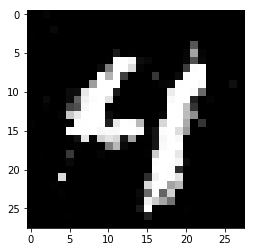

Number batches 78
92(0/78) D: 0.4638, G: 1.6727
92(1/78) D: 0.4390, G: 1.7913
92(2/78) D: 0.4665, G: 1.2128
92(3/78) D: 0.4848, G: 1.6875
92(4/78) D: 0.4456, G: 1.6870
92(5/78) D: 0.4384, G: 1.5644
92(6/78) D: 0.4239, G: 1.8100
92(7/78) D: 0.3870, G: 1.7160
92(8/78) D: 0.5491, G: 0.9530
92(9/78) D: 0.5445, G: 2.1243
92(10/78) D: 0.4816, G: 1.2016
92(11/78) D: 0.4306, G: 1.4812
92(12/78) D: 0.4341, G: 1.6885
92(13/78) D: 0.5274, G: 1.2905
92(14/78) D: 0.4478, G: 1.8299
92(15/78) D: 0.4426, G: 0.9927
92(16/78) D: 0.5089, G: 2.3078
92(17/78) D: 0.4203, G: 1.1469
92(18/78) D: 0.5086, G: 1.2219
92(19/78) D: 0.4880, G: 2.2842
92(20/78) D: 0.4989, G: 0.9553
92(21/78) D: 0.4708, G: 1.5244
92(22/78) D: 0.4542, G: 1.7824
92(23/78) D: 0.4506, G: 1.3918
92(24/78) D: 0.4894, G: 1.5423
92(25/78) D: 0.4884, G: 1.1753
92(26/78) D: 0.4802, G: 2.2613
92(27/78) D: 0.5279, G: 1.0025
92(28/78) D: 0.5302, G: 2.1664
92(29/78) D: 0.4624, G: 1.2338
92(30/78) D: 0.5284, G: 1.3524
92(31/78) D: 0.4787, G: 1.8934


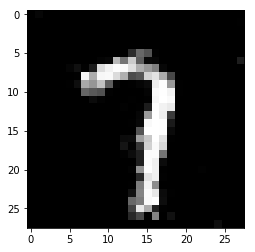

Number batches 78
93(0/78) D: 0.4559, G: 2.3931
93(1/78) D: 0.5043, G: 1.1302
93(2/78) D: 0.4967, G: 1.4885
93(3/78) D: 0.3972, G: 1.7482
93(4/78) D: 0.4434, G: 1.2228
93(5/78) D: 0.4008, G: 1.5550
93(6/78) D: 0.4078, G: 1.7616
93(7/78) D: 0.3706, G: 1.6083
93(8/78) D: 0.4771, G: 1.0908
93(9/78) D: 0.4702, G: 1.8018
93(10/78) D: 0.4239, G: 1.6023
93(11/78) D: 0.3737, G: 1.3170
93(12/78) D: 0.4228, G: 2.1989
93(13/78) D: 0.4856, G: 0.9198
93(14/78) D: 0.5008, G: 2.2615
93(15/78) D: 0.4937, G: 1.0161
93(16/78) D: 0.4135, G: 1.4589
93(17/78) D: 0.3942, G: 2.4415
93(18/78) D: 0.5617, G: 0.9000
93(19/78) D: 0.4958, G: 1.7906
93(20/78) D: 0.3834, G: 2.0750
93(21/78) D: 0.4819, G: 1.0190
93(22/78) D: 0.4775, G: 1.6018
93(23/78) D: 0.4573, G: 1.6884
93(24/78) D: 0.5036, G: 1.0895
93(25/78) D: 0.4979, G: 1.4707
93(26/78) D: 0.4237, G: 1.7804
93(27/78) D: 0.5112, G: 1.1954
93(28/78) D: 0.4958, G: 1.5886
93(29/78) D: 0.4390, G: 1.7902
93(30/78) D: 0.4944, G: 1.0563
93(31/78) D: 0.4895, G: 2.0205


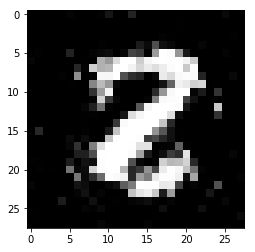

Number batches 78
94(0/78) D: 0.3945, G: 1.8323
94(1/78) D: 0.4339, G: 1.6998
94(2/78) D: 0.4352, G: 1.1209
94(3/78) D: 0.4343, G: 1.8426
94(4/78) D: 0.4539, G: 1.4903
94(5/78) D: 0.4097, G: 1.3085
94(6/78) D: 0.3816, G: 1.8883
94(7/78) D: 0.3862, G: 1.8632
94(8/78) D: 0.4685, G: 1.1070
94(9/78) D: 0.5045, G: 1.8348
94(10/78) D: 0.3874, G: 1.5158
94(11/78) D: 0.4053, G: 1.9096
94(12/78) D: 0.4382, G: 1.4074
94(13/78) D: 0.4781, G: 1.5971
94(14/78) D: 0.4289, G: 1.5354
94(15/78) D: 0.3684, G: 1.6793
94(16/78) D: 0.4057, G: 1.5133
94(17/78) D: 0.3743, G: 2.1453
94(18/78) D: 0.5565, G: 0.7116
94(19/78) D: 0.6334, G: 2.6931
94(20/78) D: 0.4939, G: 1.1590
94(21/78) D: 0.4673, G: 1.5846
94(22/78) D: 0.4519, G: 1.7201
94(23/78) D: 0.4299, G: 1.2757
94(24/78) D: 0.4635, G: 1.6831
94(25/78) D: 0.4941, G: 1.2408
94(26/78) D: 0.5233, G: 2.0511
94(27/78) D: 0.5044, G: 0.8593
94(28/78) D: 0.4796, G: 1.9524
94(29/78) D: 0.4809, G: 1.4252
94(30/78) D: 0.4426, G: 1.1915
94(31/78) D: 0.4389, G: 1.9445


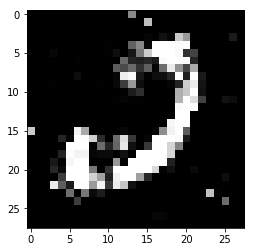

Number batches 78
95(0/78) D: 0.4650, G: 1.2582
95(1/78) D: 0.4434, G: 1.6279
95(2/78) D: 0.4780, G: 1.3975
95(3/78) D: 0.4454, G: 1.7128
95(4/78) D: 0.4164, G: 1.5206
95(5/78) D: 0.4451, G: 1.6126
95(6/78) D: 0.3892, G: 1.4470
95(7/78) D: 0.4127, G: 1.6978
95(8/78) D: 0.4796, G: 1.1013
95(9/78) D: 0.4693, G: 1.3751
95(10/78) D: 0.4184, G: 2.1208
95(11/78) D: 0.4418, G: 1.0798
95(12/78) D: 0.4724, G: 1.8150
95(13/78) D: 0.4477, G: 1.1832
95(14/78) D: 0.4333, G: 1.5987
95(15/78) D: 0.3848, G: 1.6687
95(16/78) D: 0.3668, G: 1.2855
95(17/78) D: 0.3922, G: 1.8431
95(18/78) D: 0.5045, G: 0.9111
95(19/78) D: 0.5105, G: 2.1501
95(20/78) D: 0.4251, G: 1.7272
95(21/78) D: 0.4474, G: 0.9687
95(22/78) D: 0.4287, G: 1.4579
95(23/78) D: 0.4201, G: 1.7374
95(24/78) D: 0.5159, G: 1.2886
95(25/78) D: 0.4773, G: 1.3839
95(26/78) D: 0.4359, G: 1.8188
95(27/78) D: 0.4566, G: 1.1471
95(28/78) D: 0.4528, G: 1.4456
95(29/78) D: 0.4515, G: 2.1607
95(30/78) D: 0.5014, G: 0.8500
95(31/78) D: 0.5112, G: 1.9223


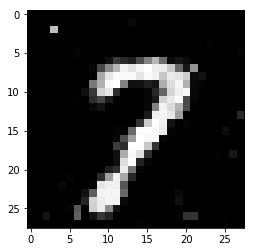

Number batches 78
96(0/78) D: 0.4702, G: 1.6347
96(1/78) D: 0.4107, G: 1.4948
96(2/78) D: 0.4979, G: 1.2884
96(3/78) D: 0.4435, G: 1.9555
96(4/78) D: 0.4437, G: 1.6109
96(5/78) D: 0.4109, G: 1.7951
96(6/78) D: 0.3546, G: 1.5769
96(7/78) D: 0.3981, G: 1.7672
96(8/78) D: 0.4756, G: 1.3935
96(9/78) D: 0.4532, G: 1.4425
96(10/78) D: 0.3825, G: 1.6572
96(11/78) D: 0.3874, G: 1.5278
96(12/78) D: 0.4212, G: 1.5631
96(13/78) D: 0.4434, G: 1.6144
96(14/78) D: 0.3898, G: 1.3148
96(15/78) D: 0.3967, G: 1.4140
96(16/78) D: 0.3858, G: 1.7411
96(17/78) D: 0.3991, G: 1.5959
96(18/78) D: 0.4777, G: 1.1230
96(19/78) D: 0.4958, G: 1.9586
96(20/78) D: 0.4480, G: 1.3297
96(21/78) D: 0.4711, G: 1.3935
96(22/78) D: 0.4383, G: 1.4759
96(23/78) D: 0.4387, G: 1.7365
96(24/78) D: 0.4814, G: 1.3126
96(25/78) D: 0.4534, G: 1.4553
96(26/78) D: 0.3946, G: 1.9429
96(27/78) D: 0.4518, G: 1.0418
96(28/78) D: 0.4606, G: 1.9299
96(29/78) D: 0.4426, G: 1.0621
96(30/78) D: 0.5583, G: 1.8447
96(31/78) D: 0.4436, G: 1.1655


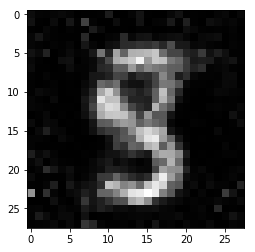

Number batches 78
97(0/78) D: 0.4219, G: 2.0290
97(1/78) D: 0.4199, G: 1.4491
97(2/78) D: 0.4564, G: 1.5370
97(3/78) D: 0.4313, G: 1.9087
97(4/78) D: 0.4527, G: 1.2567
97(5/78) D: 0.4865, G: 2.1038
97(6/78) D: 0.3962, G: 1.1470
97(7/78) D: 0.4266, G: 1.7575
97(8/78) D: 0.4923, G: 1.2817
97(9/78) D: 0.5087, G: 1.7632
97(10/78) D: 0.3952, G: 1.4709
97(11/78) D: 0.4037, G: 1.4516
97(12/78) D: 0.4413, G: 1.8044
97(13/78) D: 0.5242, G: 1.1325
97(14/78) D: 0.4296, G: 1.6890
97(15/78) D: 0.4136, G: 1.7485
97(16/78) D: 0.4105, G: 1.9310
97(17/78) D: 0.3540, G: 1.7984
97(18/78) D: 0.5218, G: 1.3296
97(19/78) D: 0.4653, G: 1.8563
97(20/78) D: 0.4436, G: 1.1826
97(21/78) D: 0.5044, G: 1.8113
97(22/78) D: 0.4451, G: 1.5448
97(23/78) D: 0.4130, G: 1.9952
97(24/78) D: 0.4548, G: 0.8337
97(25/78) D: 0.5118, G: 1.9600
97(26/78) D: 0.3892, G: 1.8380
97(27/78) D: 0.4154, G: 1.2111
97(28/78) D: 0.5199, G: 2.1097
97(29/78) D: 0.4798, G: 1.2451
97(30/78) D: 0.4750, G: 1.3774
97(31/78) D: 0.4388, G: 2.1699


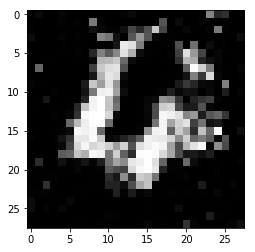

Number batches 78
98(0/78) D: 0.4019, G: 1.3668
98(1/78) D: 0.3927, G: 1.5567
98(2/78) D: 0.4925, G: 1.2930
98(3/78) D: 0.4758, G: 2.1426
98(4/78) D: 0.4326, G: 1.2545
98(5/78) D: 0.4509, G: 1.7422
98(6/78) D: 0.3948, G: 1.7264
98(7/78) D: 0.4199, G: 1.5611
98(8/78) D: 0.4486, G: 1.4761
98(9/78) D: 0.4811, G: 1.5406
98(10/78) D: 0.3908, G: 1.8460
98(11/78) D: 0.3747, G: 1.2581
98(12/78) D: 0.4235, G: 1.5075
98(13/78) D: 0.4757, G: 1.2856
98(14/78) D: 0.4332, G: 2.2192
98(15/78) D: 0.4441, G: 1.0184
98(16/78) D: 0.4607, G: 2.2641
98(17/78) D: 0.4078, G: 1.6419
98(18/78) D: 0.5209, G: 1.2152
98(19/78) D: 0.4470, G: 2.1273
98(20/78) D: 0.4128, G: 1.3906
98(21/78) D: 0.4652, G: 1.4441
98(22/78) D: 0.4439, G: 1.6089
98(23/78) D: 0.4044, G: 1.6673
98(24/78) D: 0.4046, G: 1.3460
98(25/78) D: 0.4584, G: 1.5476
98(26/78) D: 0.4373, G: 2.0980
98(27/78) D: 0.4318, G: 0.9157
98(28/78) D: 0.4817, G: 1.9167
98(29/78) D: 0.4362, G: 1.6436
98(30/78) D: 0.4635, G: 1.2585
98(31/78) D: 0.4511, G: 2.3463


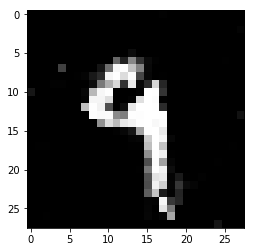

Number batches 78
99(0/78) D: 0.4108, G: 1.6112
99(1/78) D: 0.4102, G: 1.3046
99(2/78) D: 0.4479, G: 1.7332
99(3/78) D: 0.4316, G: 1.6226
99(4/78) D: 0.4109, G: 1.5438
99(5/78) D: 0.3797, G: 1.3842
99(6/78) D: 0.4164, G: 1.9345
99(7/78) D: 0.4110, G: 1.5651
99(8/78) D: 0.4948, G: 1.6354
99(9/78) D: 0.4213, G: 1.5076
99(10/78) D: 0.3890, G: 2.1163
99(11/78) D: 0.4078, G: 1.1224
99(12/78) D: 0.4609, G: 1.9929
99(13/78) D: 0.4952, G: 1.0182
99(14/78) D: 0.4177, G: 1.9098
99(15/78) D: 0.3938, G: 1.4015
99(16/78) D: 0.3835, G: 1.6689
99(17/78) D: 0.3527, G: 2.0020
99(18/78) D: 0.4637, G: 1.0871
99(19/78) D: 0.4166, G: 1.9615
99(20/78) D: 0.3596, G: 2.0388
99(21/78) D: 0.4148, G: 0.9087
99(22/78) D: 0.5605, G: 2.6141
99(23/78) D: 0.4966, G: 1.2246
99(24/78) D: 0.4427, G: 1.6065
99(25/78) D: 0.4490, G: 1.5028
99(26/78) D: 0.3928, G: 1.6121
99(27/78) D: 0.4190, G: 1.6383
99(28/78) D: 0.4059, G: 1.5518
99(29/78) D: 0.4302, G: 1.5389
99(30/78) D: 0.4551, G: 1.2535
99(31/78) D: 0.4258, G: 2.0131


In [43]:
batch_size = 128

for epoch in range(100):
    print('Epoch #%d' % epoch)
    
    # Generate an image and display it.
    disp_sample(g)
    
    num_batches = int(x_train.shape[0] / batch_size)
    print('Number batches %i' % num_batches)
    for i in range(num_batches):
        # A training iteration
        
        # Generate noise.
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))
        
        # Generate images from the noise using the generator.
        generated_images = g.predict(noise)
        
        # Grab the image batch for this iteration. 
        real_images = x_train[i * batch_size: (i+1) * batch_size]
        
        # Contains the real and fake images.
        X = np.concatenate([generated_images, real_images])
        
        # Labels if the sample is real (1) or not real (0). 
        y = np.concatenate([np.zeros(generated_images.shape[0]), np.ones(real_images.shape[0])])

        # Train the discriminator using the generated images and the real images.
        d.trainable = True
        d_loss = d.train_on_batch(X, y)
        d.trainable = False
        
        # Generate more noise to feed into the full gan network to train the generative portion. 
        noise = np.random.uniform(-1, 1, size=(batch_size, NOISE_DIM))

        # Get the g_loss
        g_loss = gd.train_on_batch(noise, np.ones(noise.shape[0]))
        
        print('%i(%i/%i) D: %.4f, G: %.4f' % (epoch, i, num_batches, d_loss, g_loss))